In [5]:
import importlib

In [6]:
import scheduler3

importlib.reload(scheduler3)

from scheduler3 import HospitalistSchedulerLP, DEFAULT_DOCTORS, DEFAULT_DEMAND

In [67]:
import sensi
importlib.reload(sensi)
from sensi import lp_relaxation_duals, shadow_price_df, min_reduced_cost_df, plot_sensitivity

In [8]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 1, 'SH': 1.0, 'MWC': 1}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=1e7,
    pen_over=1.0,
    lambda_used=0.01,
    start_dow=0
)

sched.build()

In [9]:
sched.solve_mip(msg=False, time_limit=300, rel_gap=0.001)

'Optimal'

In [10]:
lp_status, shadow, rc = sched.solve_lp_duals(msg=False)

In [11]:
# Example reads:
print("Shadow price for MOKC day 12:", shadow[('MOKC', 11)])
# Most attractive (LP) assignments:
top = sorted(rc.items(), key=lambda kv: kv[1])[:10]
for (d,h,t), r in top:
    print(f"RC={r:.3f}  x[{d},{h},day{t+1}]")

Shadow price for MOKC day 12: 10000000.0
RC=-200000000.000  x[Riggs,MOKC,day2]
RC=-200000000.000  x[Riggs,MOKC,day25]
RC=-200000000.000  x[Treadwell,MOKC,day2]
RC=-200000000.000  x[Treadwell,MOKC,day9]
RC=-200000000.000  x[Treadwell,MOKC,day18]
RC=-160000000.000  x[Blair,SH,day7]
RC=-160000000.000  x[Blair,SH,day10]
RC=-160000000.000  x[Blair,SH,day11]
RC=-160000000.000  x[Blair,SH,day12]
RC=-160000000.000  x[Blair,SH,day13]


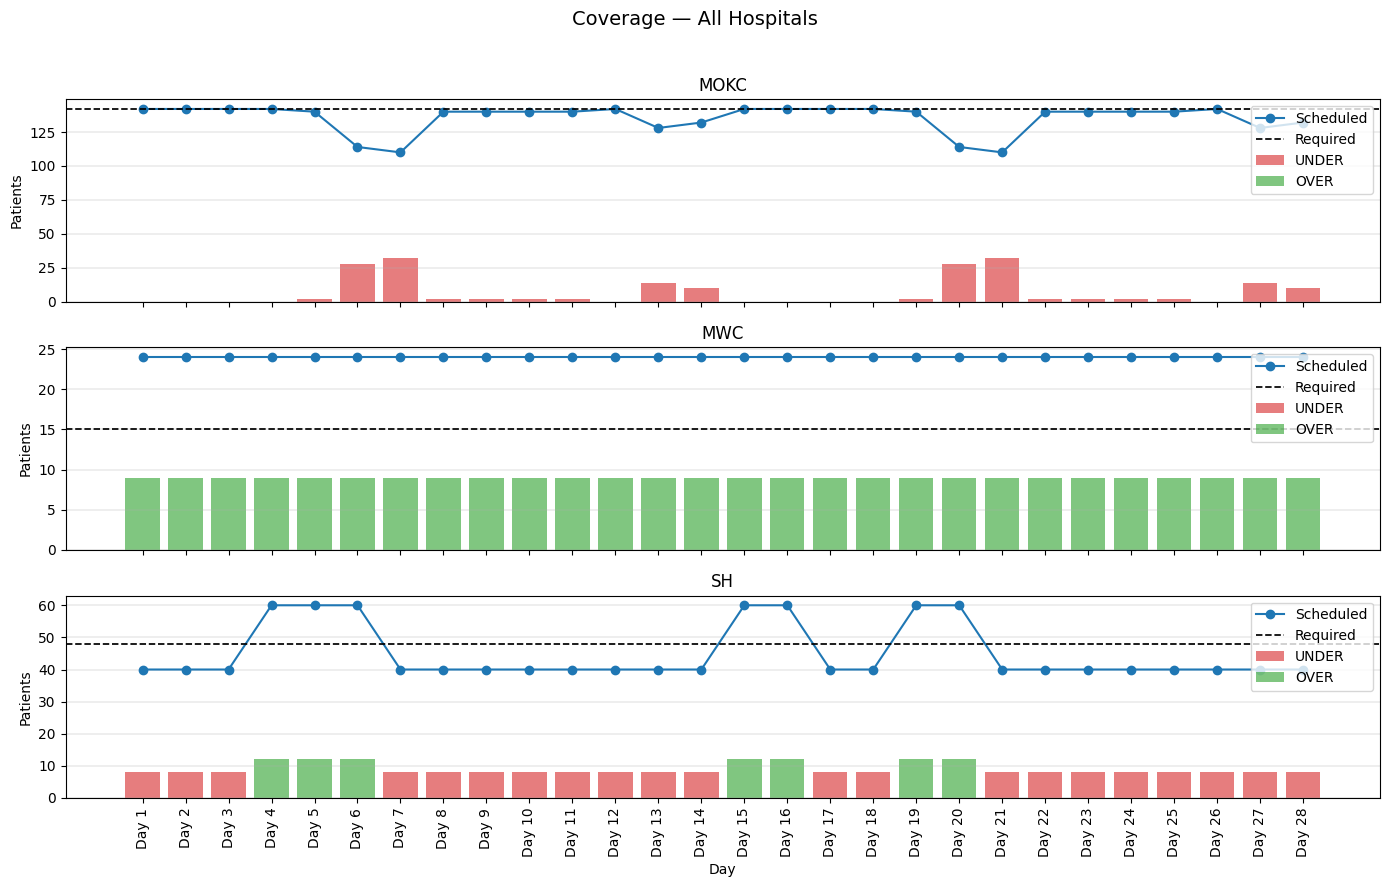

In [12]:
sched.plot_coverage()

In [40]:
sched.solve_mip(msg=False, time_limit=300, rel_gap=0.001)

'Optimal'

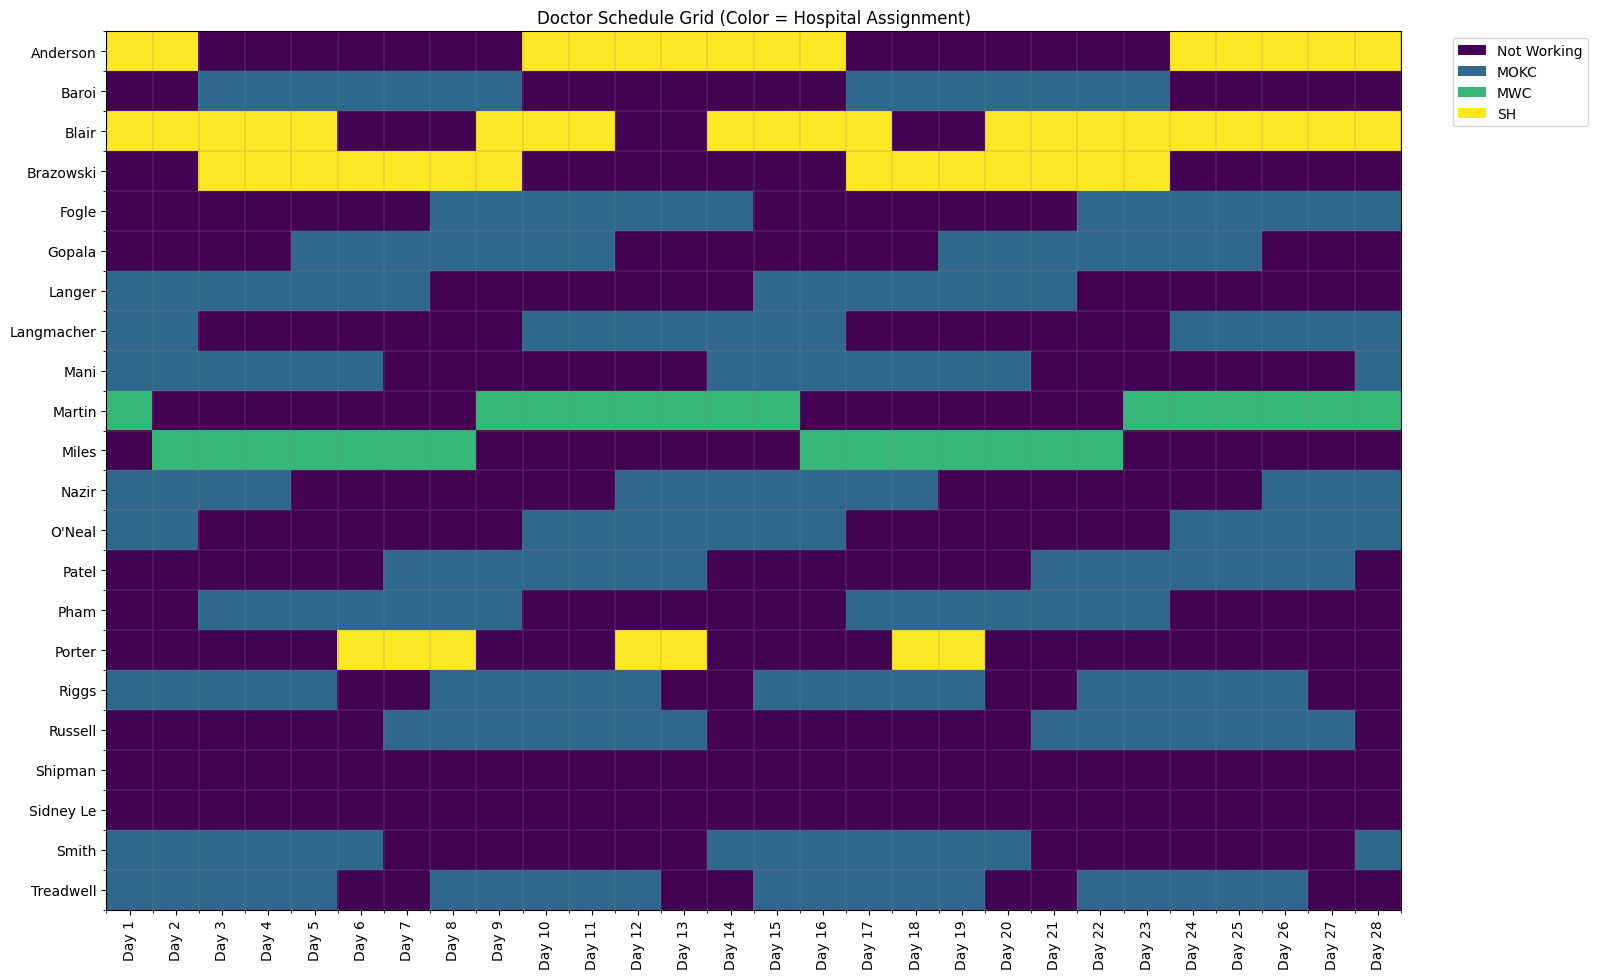

In [41]:
sched.grid()

In [42]:
rc.items()

dict_items([(('Anderson', 'SH', 0), 0.0), (('Anderson', 'SH', 1), 0.0), (('Anderson', 'SH', 2), 0.0), (('Anderson', 'SH', 3), 0.0), (('Anderson', 'SH', 4), 0.0), (('Anderson', 'SH', 5), 0.0), (('Anderson', 'SH', 6), 0.0), (('Anderson', 'SH', 7), 0.0), (('Anderson', 'SH', 8), 0.0), (('Anderson', 'SH', 9), 0.0), (('Anderson', 'SH', 10), 0.0), (('Anderson', 'SH', 11), 0.0), (('Anderson', 'SH', 12), 0.0), (('Anderson', 'SH', 13), 0.0), (('Anderson', 'SH', 14), 0.0), (('Anderson', 'SH', 15), 0.0), (('Anderson', 'SH', 16), 0.0), (('Anderson', 'SH', 17), 0.0), (('Anderson', 'SH', 18), 0.0), (('Anderson', 'SH', 19), 0.0), (('Anderson', 'SH', 20), 0.0), (('Anderson', 'SH', 21), 0.0), (('Anderson', 'SH', 22), 0.0), (('Anderson', 'SH', 23), 0.0), (('Anderson', 'SH', 24), 0.0), (('Anderson', 'SH', 25), 0.0), (('Anderson', 'SH', 26), 0.0), (('Anderson', 'SH', 27), 0.0), (('Baroi', 'MOKC', 0), 0.0), (('Baroi', 'MOKC', 1), 0.0), (('Baroi', 'MOKC', 2), 0.0), (('Baroi', 'MOKC', 3), 0.0), (('Baroi', 'MO

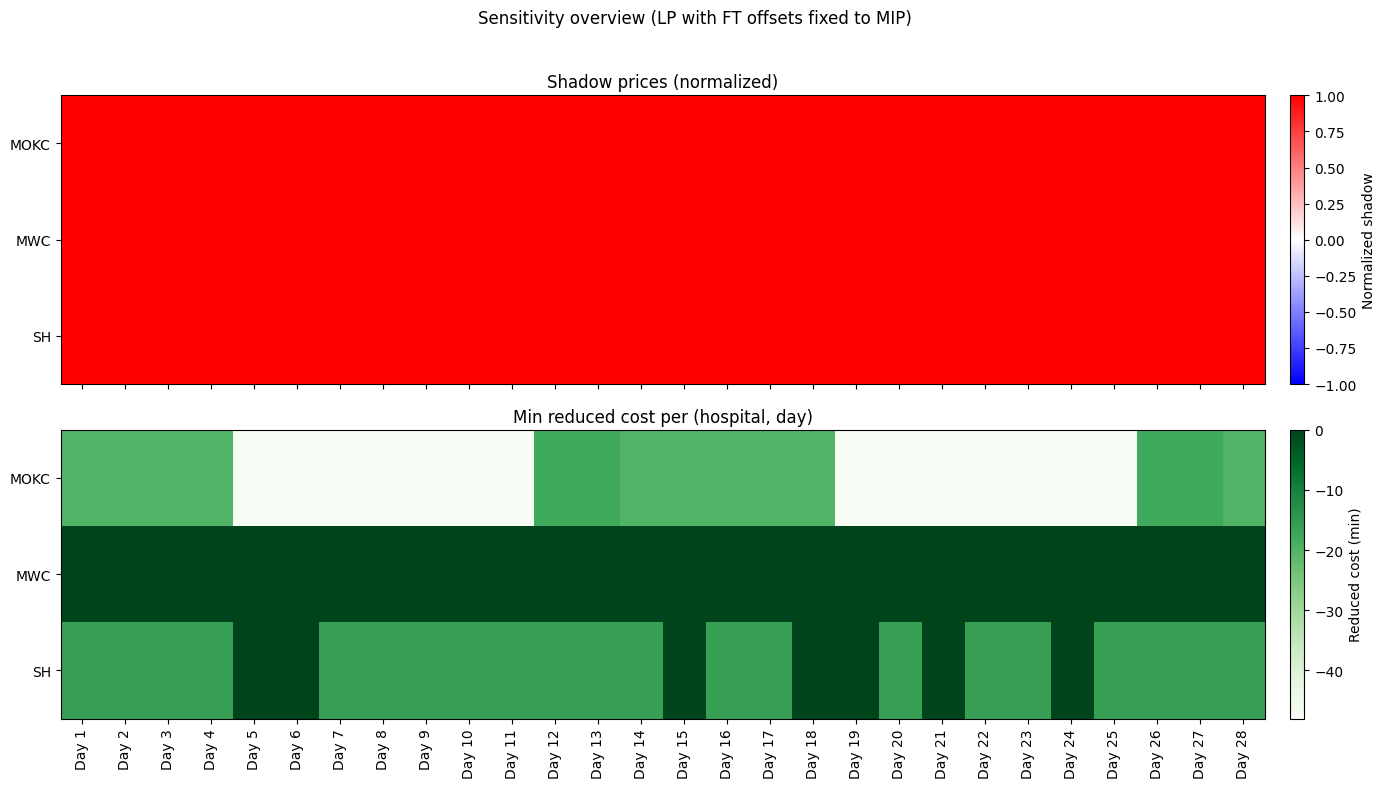

(<Figure size 1400x800 with 4 Axes>,
 array([<Axes: title={'center': 'Shadow prices (normalized)'}>,
        <Axes: title={'center': 'Min reduced cost per (hospital, day)'}>],
       dtype=object))

In [43]:
status, duals, rcosts, lp_u, lp_o = lp_relaxation_duals(sched, fix_ft_offsets=True)

# 3) Build the tables and plot
sp = shadow_price_df(sched, duals)
mr = min_reduced_cost_df(sched, rcosts, clip=1e5)
plot_sensitivity(sched, sp, mr)

In [55]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 1, 'SH': 1.0, 'MWC': 1}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=1,
    pen_over=1.0,
    lambda_used=0.01,
    start_dow=0
)

sched.build()

In [56]:
sched.solve_mip(msg=False, time_limit=300, rel_gap=0.001)

'Optimal'

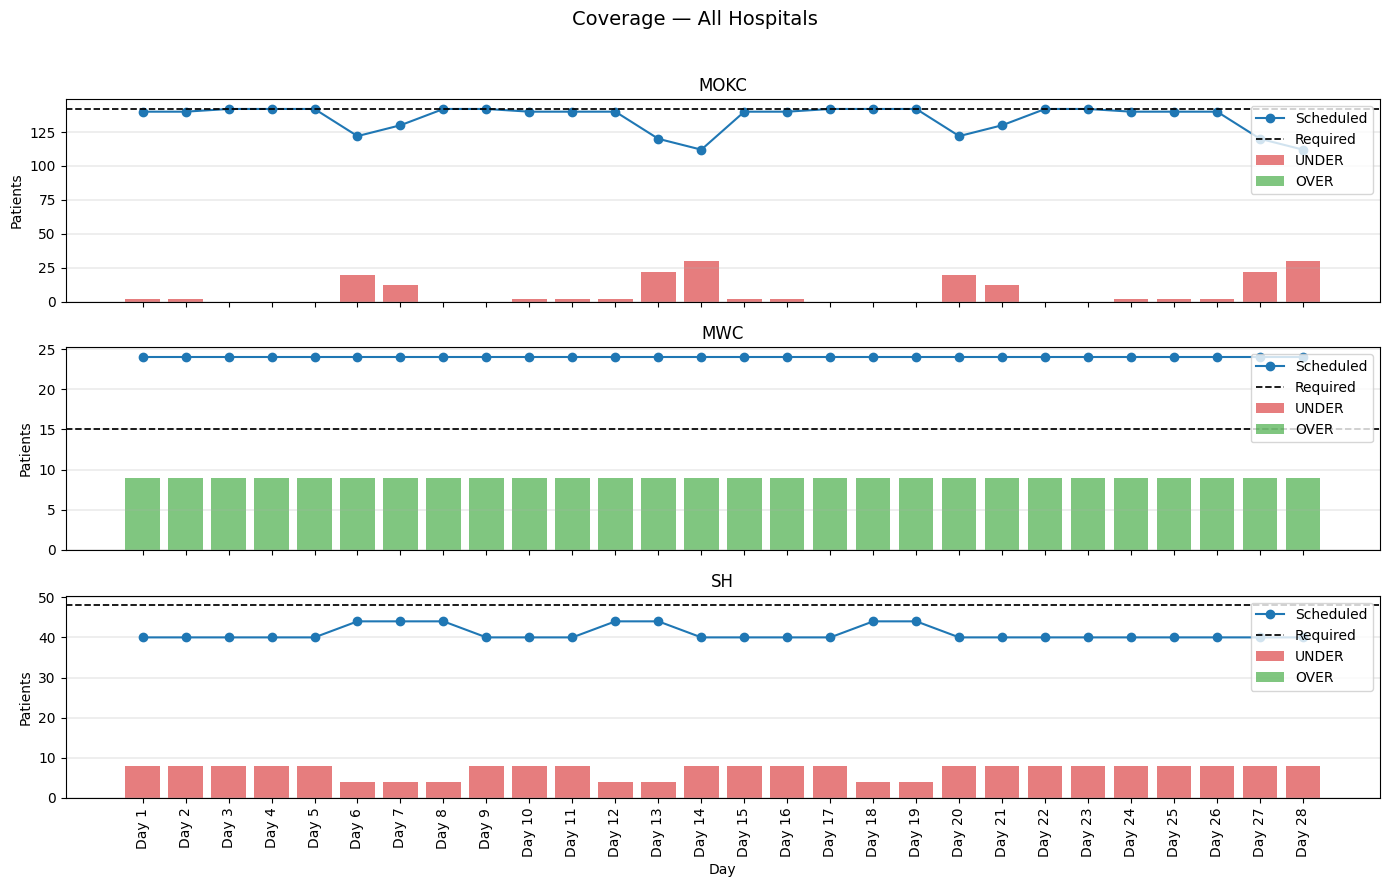

In [57]:
sched.plot_coverage()

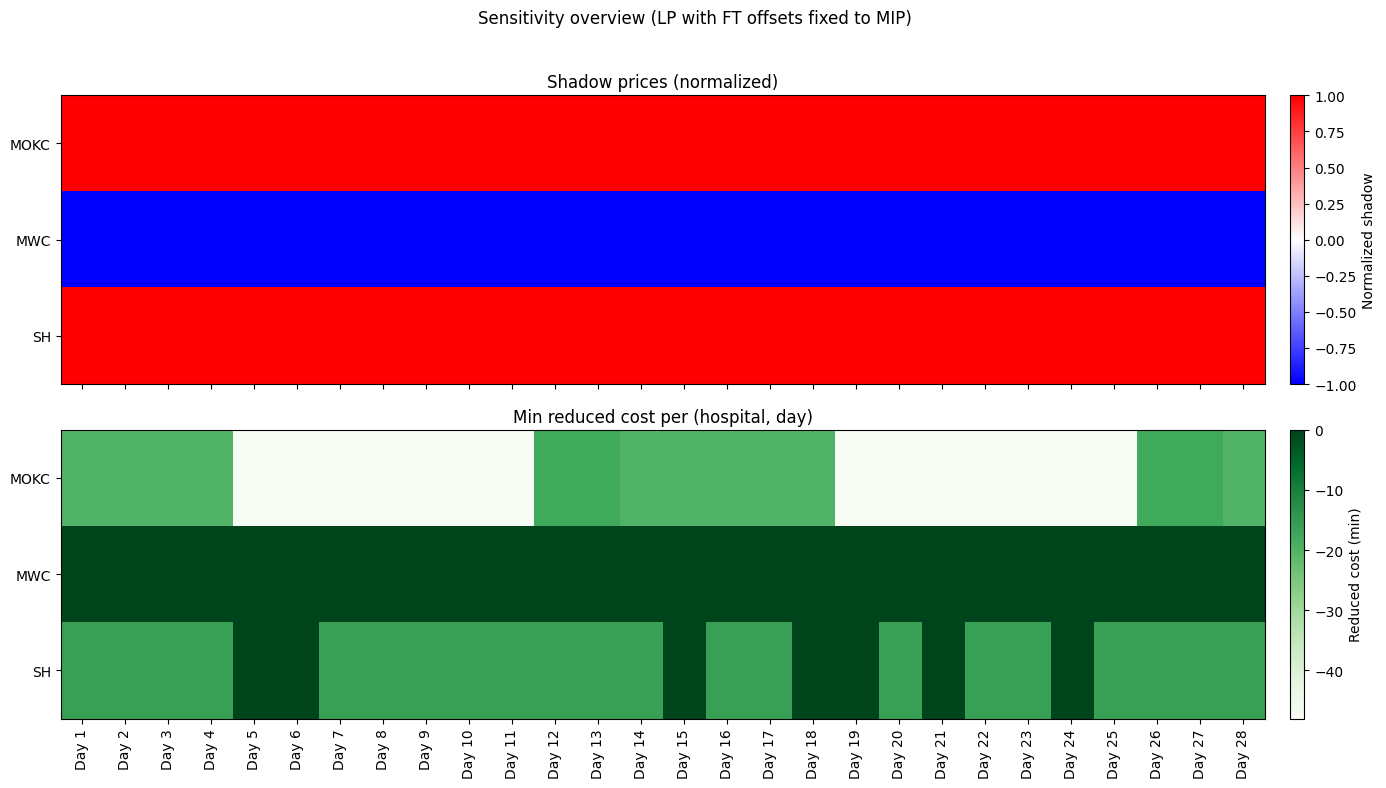

(<Figure size 1400x800 with 4 Axes>,
 array([<Axes: title={'center': 'Shadow prices (normalized)'}>,
        <Axes: title={'center': 'Min reduced cost per (hospital, day)'}>],
       dtype=object))

In [58]:
status, duals, rcosts, lp_u, lp_o = lp_relaxation_duals(sched, fix_ft_offsets=True)

# 3) Build the tables and plot
sp = shadow_price_df(sched, duals)
mr = min_reduced_cost_df(sched, rcosts, clip=1e5)
plot_sensitivity(sched, sp, mr, normalize=False)

In [49]:
doctors=DEFAULT_DOCTORS,
base_demand=DEFAULT_DEMAND,
demand_scale={'MOKC': 1, 'SH': 1.0, 'MWC': 1}  # or daily_demand=...
sched = HospitalistSchedulerLP(
    doctors=DEFAULT_DOCTORS,
    base_demand=DEFAULT_DEMAND,
    demand_scale=demand_scale,  # or daily_demand=...
    pen_under=1000,
    pen_over=1.0,
    lambda_used=0.01,
    start_dow=0
)

sched.build()

In [50]:
sched.solve_mip(msg=False, time_limit=300, rel_gap=0.001)

'Optimal'

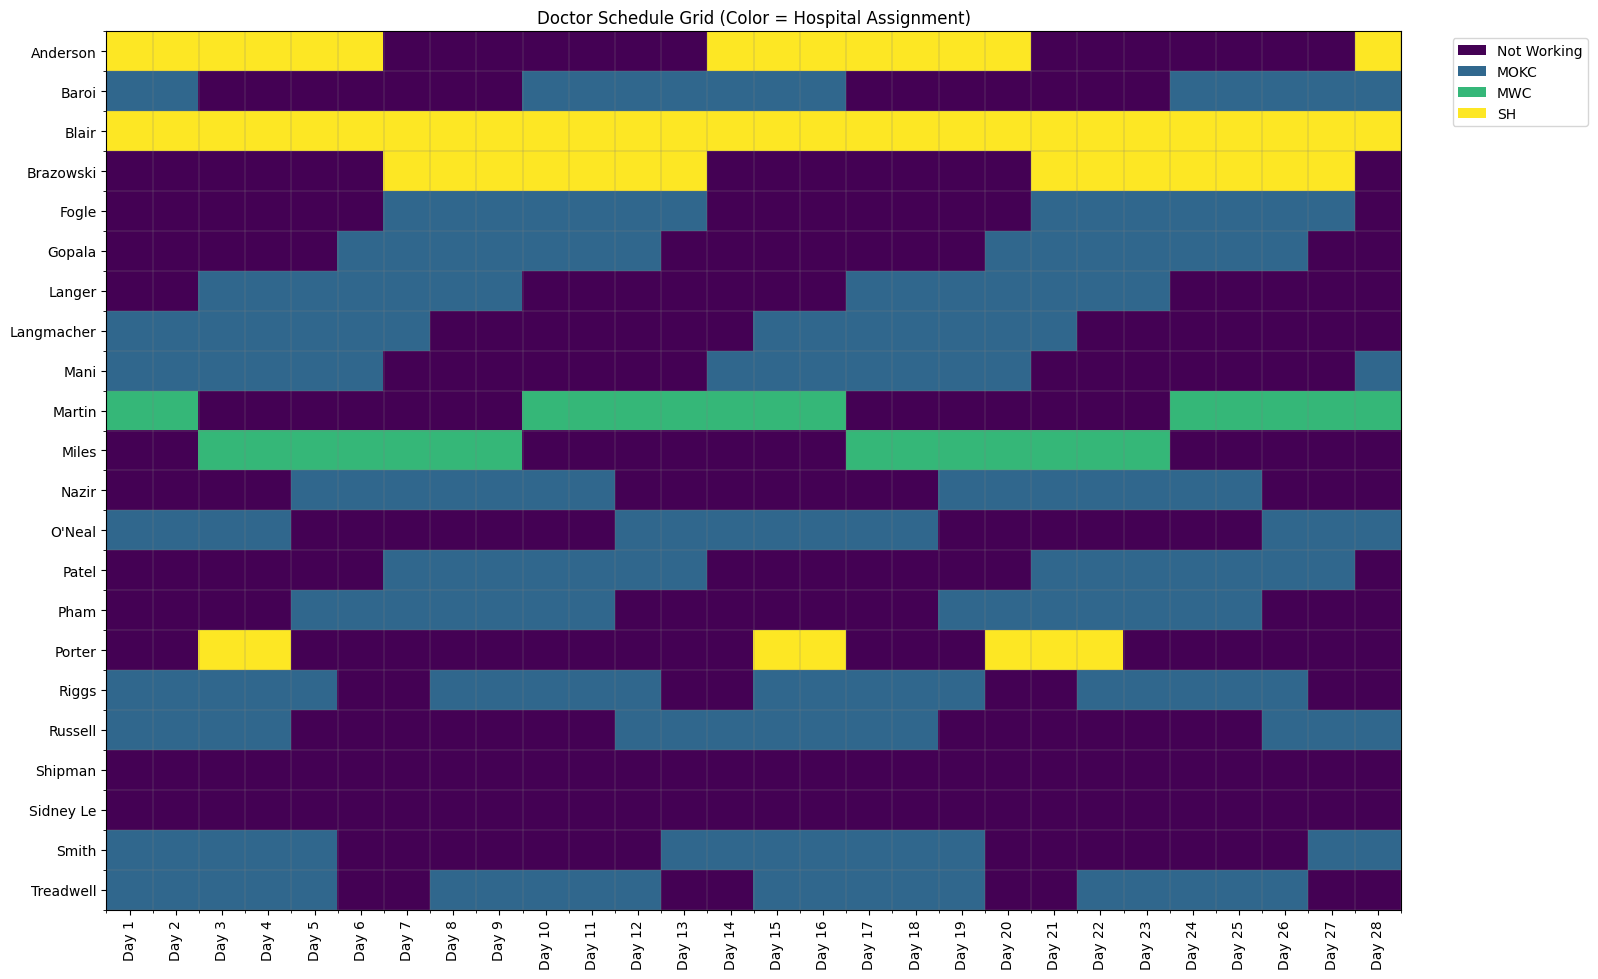

In [51]:
sched.grid()

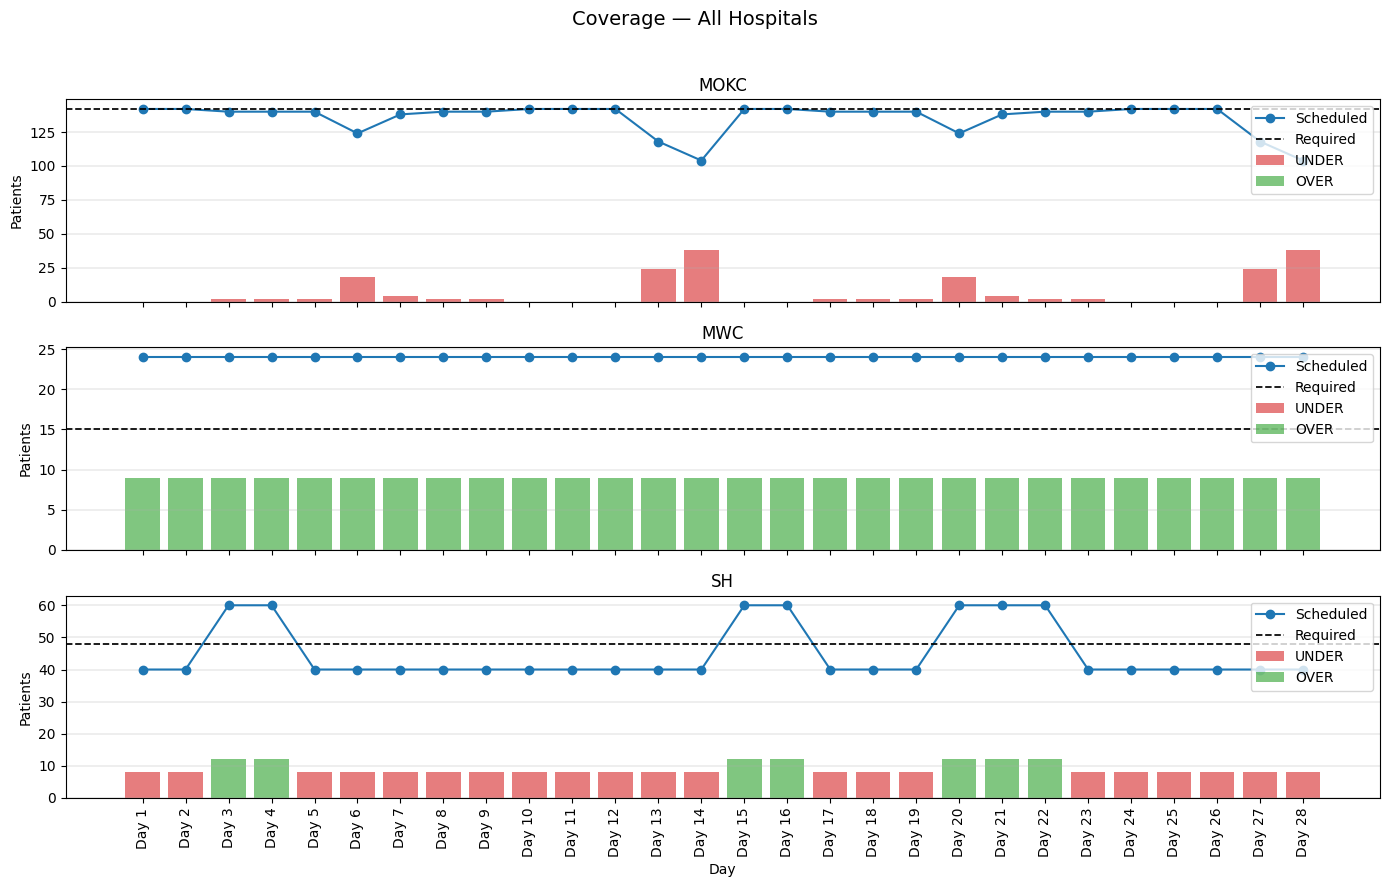

In [52]:
sched.plot_coverage()

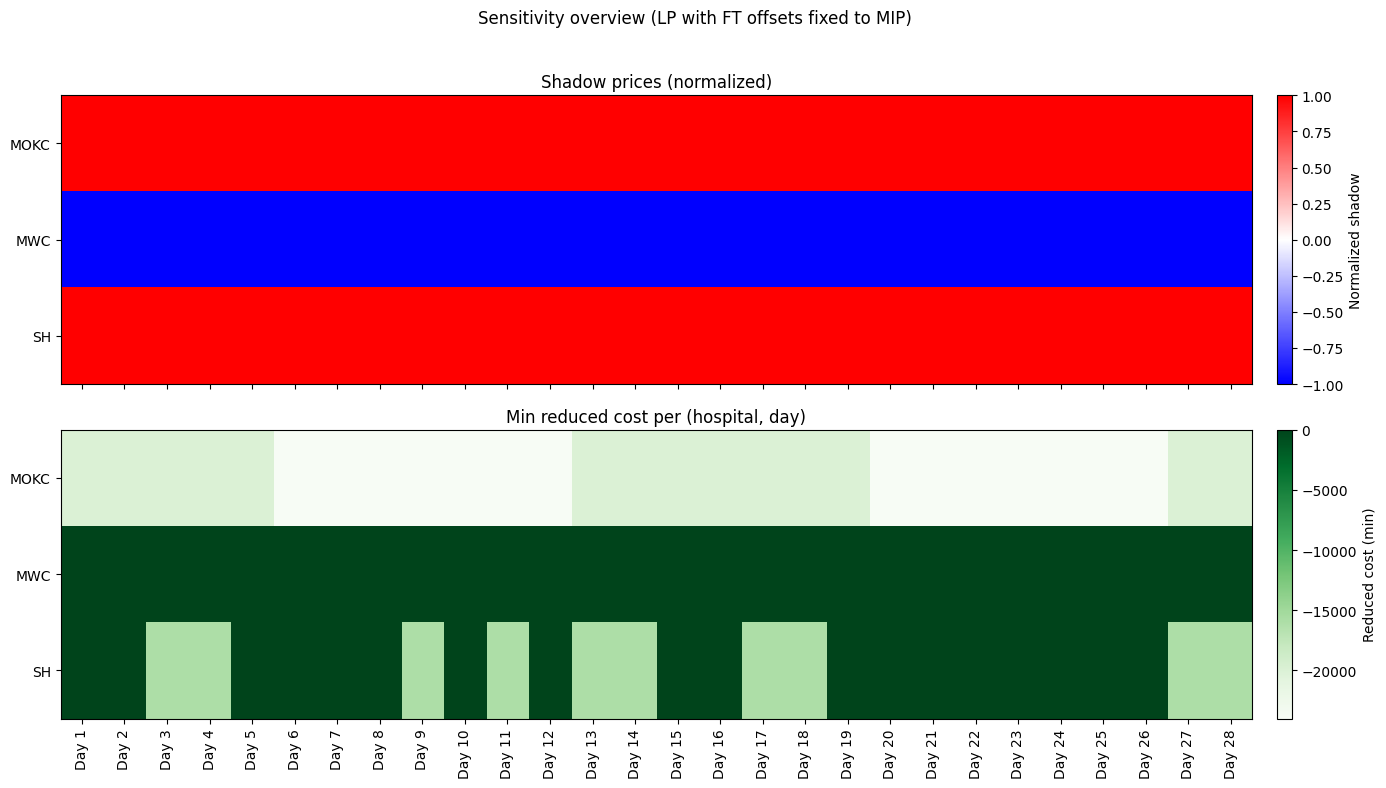

(<Figure size 1400x800 with 4 Axes>,
 array([<Axes: title={'center': 'Shadow prices (normalized)'}>,
        <Axes: title={'center': 'Min reduced cost per (hospital, day)'}>],
       dtype=object))

In [54]:
status, duals, rcosts, lp_u, lp_o = lp_relaxation_duals(sched, fix_ft_offsets=True)

# 3) Build the tables and plot
sp = shadow_price_df(sched, duals)
mr = min_reduced_cost_df(sched, rcosts, clip=1e5)
plot_sensitivity(sched, sp, mr, normalize=False)

In [59]:
from tqdm import tqdm

In [69]:
DEFAULT_DOCTORS.pop("FT1")
DEFAULT_DOCTORS.pop("FT2")

{'patients': 20, 'MOKC': 1, 'SH': 1, 'MWC': 1, 'type': 'FT'}

In [70]:
results_no_new_docs = []
for E in tqdm(range(1,10, 2)):
    sched = HospitalistSchedulerLP(
        doctors=DEFAULT_DOCTORS,
        base_demand=DEFAULT_DEMAND,
        demand_scale=demand_scale,  # or daily_demand=...
        pen_under=1*10**E,
        pen_over=1,
        lambda_used=0.01,
        start_dow=0
    )

    sched.build()
    sched.solve_mip(msg=False, time_limit=300, rel_gap=0.001)
    status, duals, rcosts, lp_u, lp_o = lp_relaxation_duals(sched, fix_ft_offsets=True)
    sp = shadow_price_df(sched, duals)
    mr = min_reduced_cost_df(sched, rcosts, clip=1e5)
    results_no_new_docs.append(
        [E, sp, mr, sched]
    )

# for r in results_no_new_docs:
#     E, sp, mr, sched = tuple(r)
#     print(E)
#     plot_sensitivity(sched, sp, mr, normalize=False)
    

100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


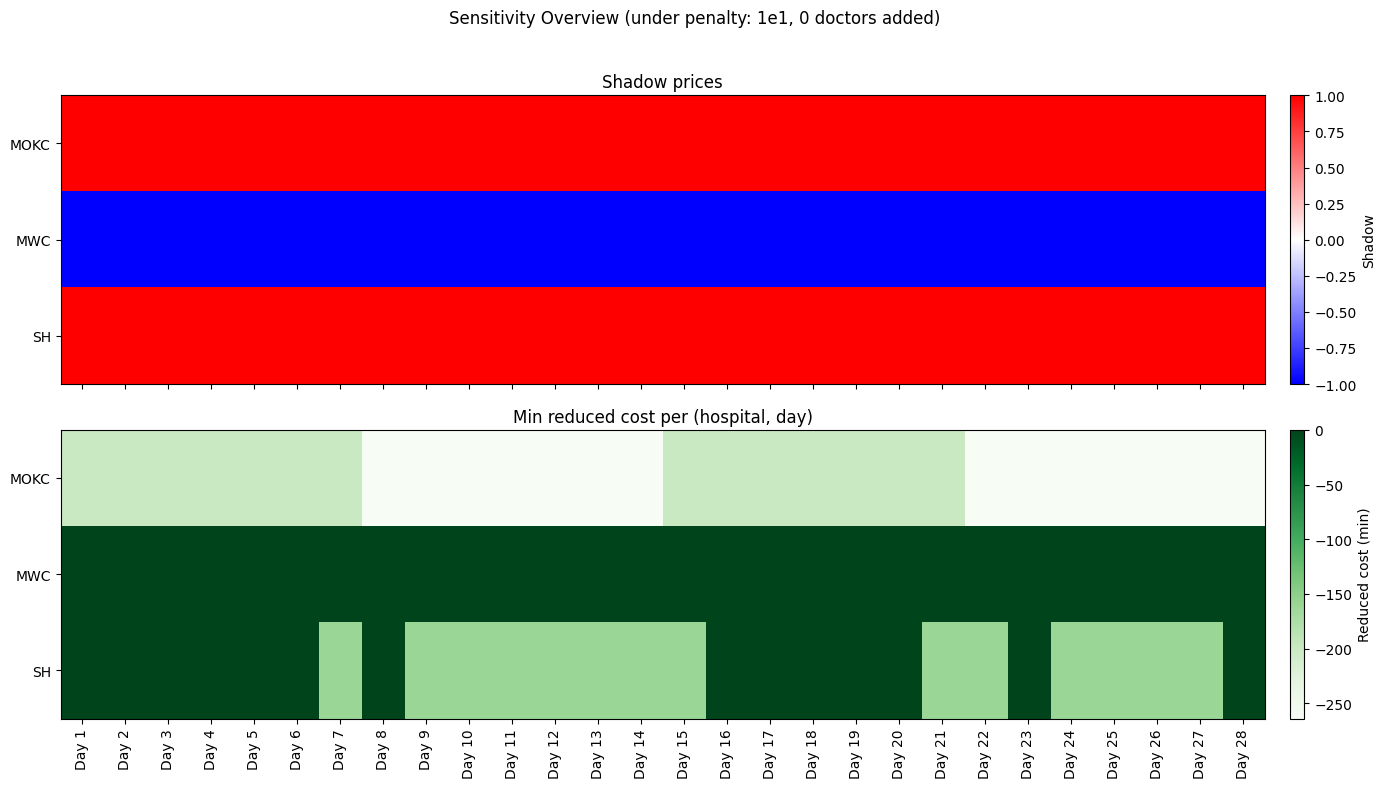

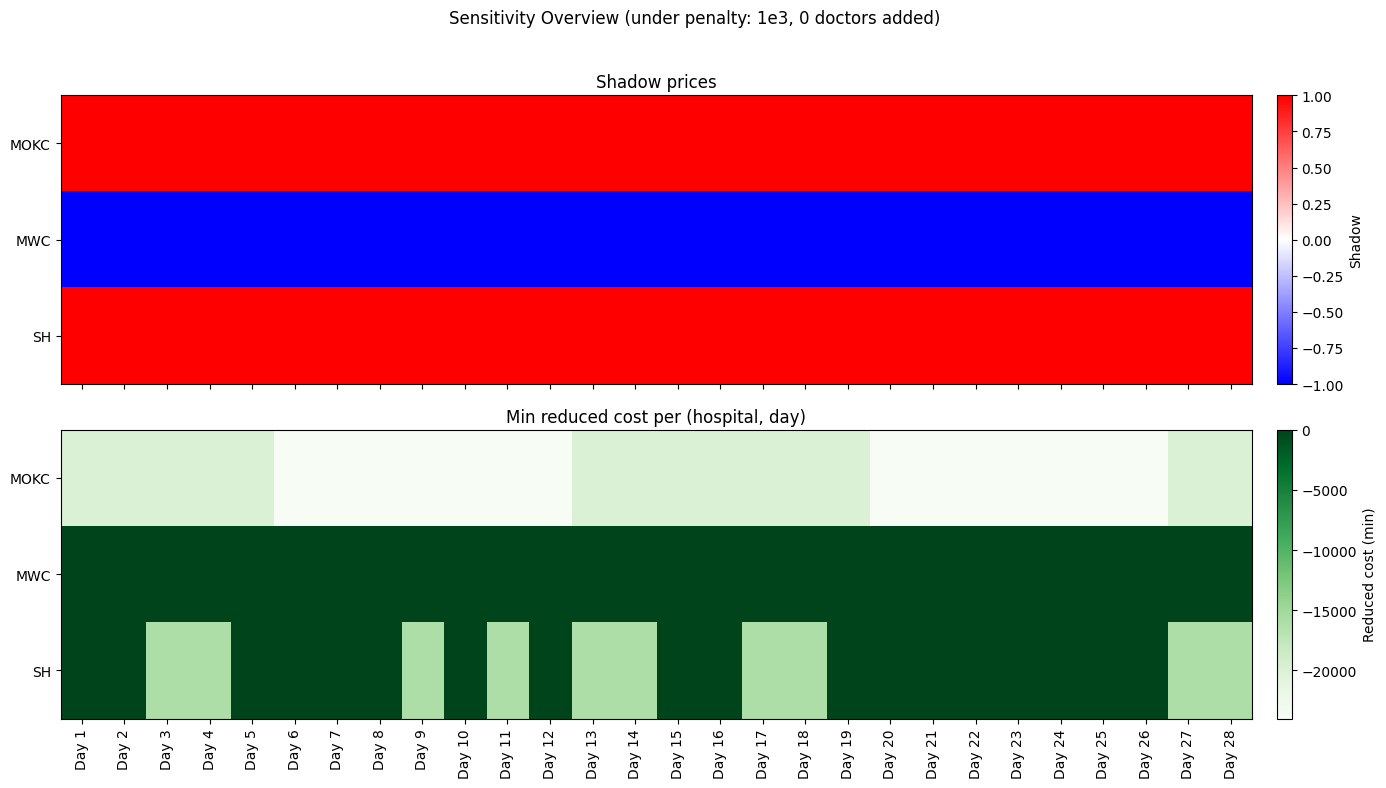

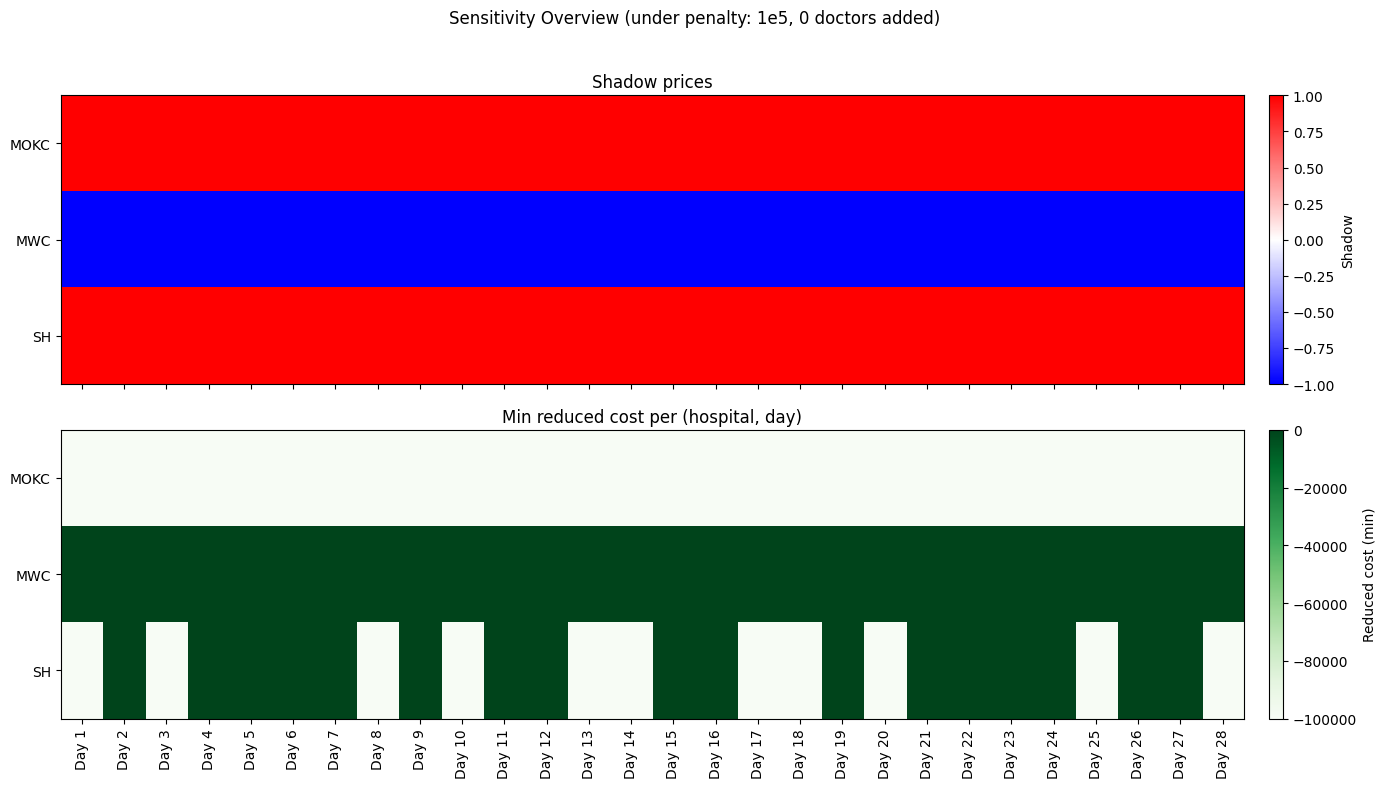

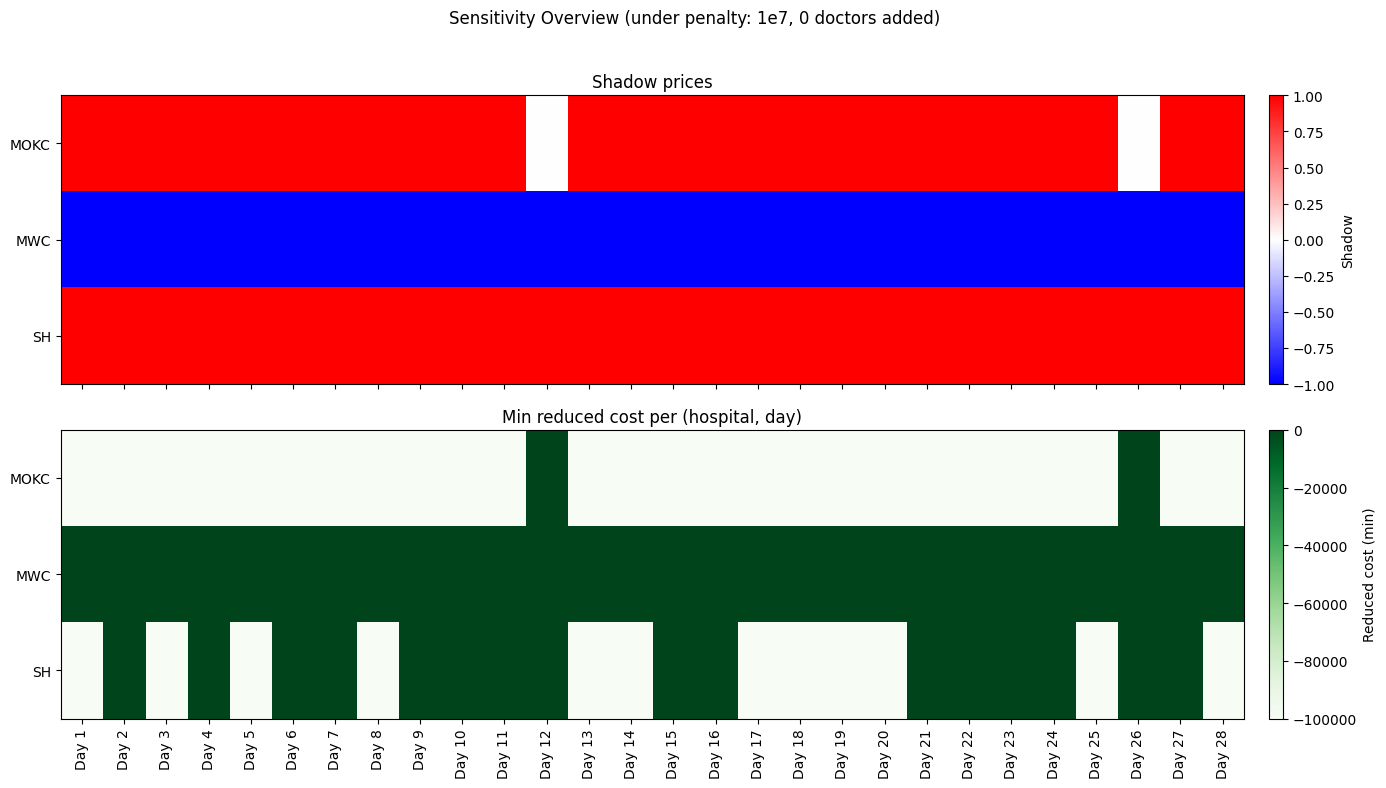

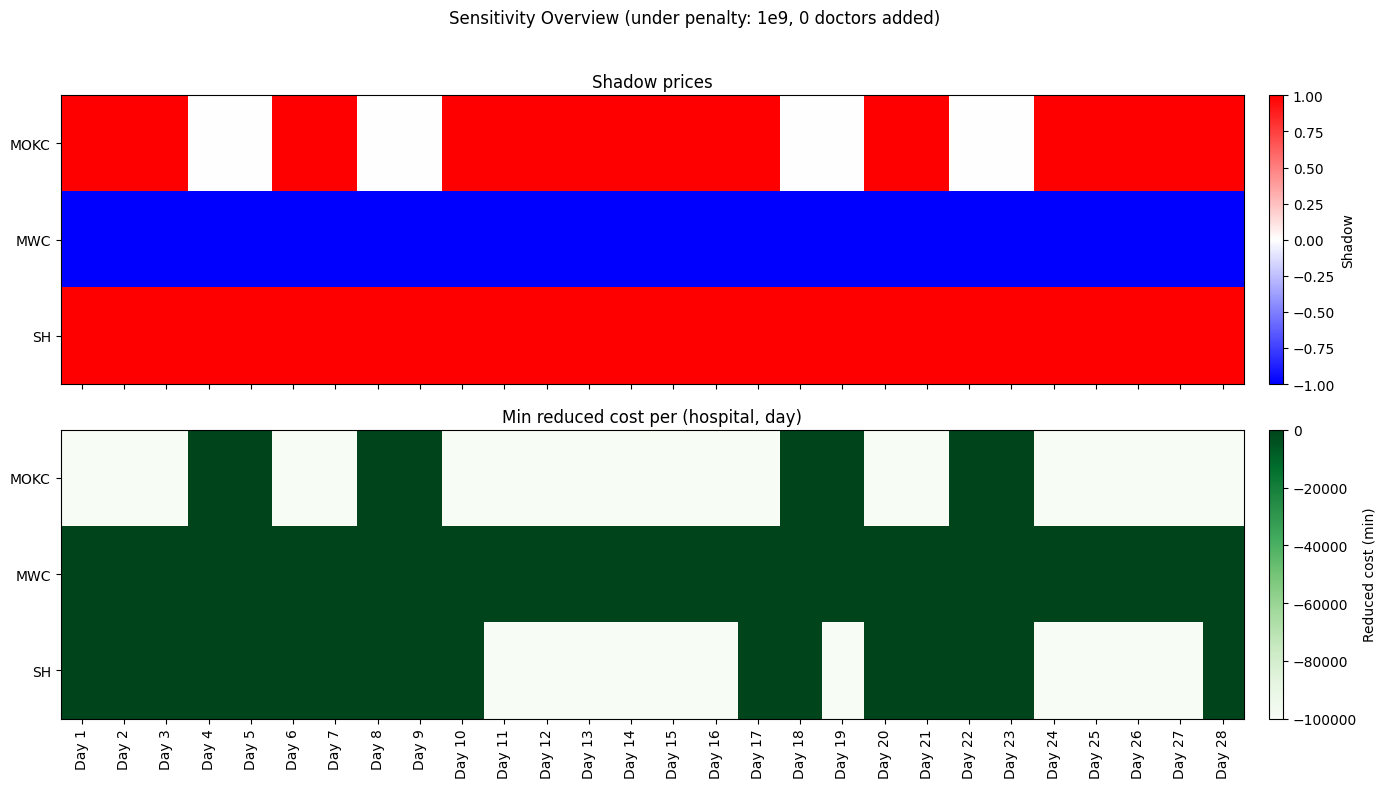

In [80]:
for r in results_no_new_docs:
    E, sp, mr, sched = tuple(r)
    title = f"Sensitivity Overview (under penalty: 1e{E}, 0 doctors added)"
    plot_sensitivity(sched, sp, mr, normalize=False, suptitle=title)

In [71]:
DEFAULT_DOCTORS['FT1'] = {
    'patients': 20,
    'MOKC': 1, 'SH': 1, 'MWC':1,
    'type': 'FT'
}

100%|██████████| 5/5 [01:29<00:00, 17.93s/it]


1


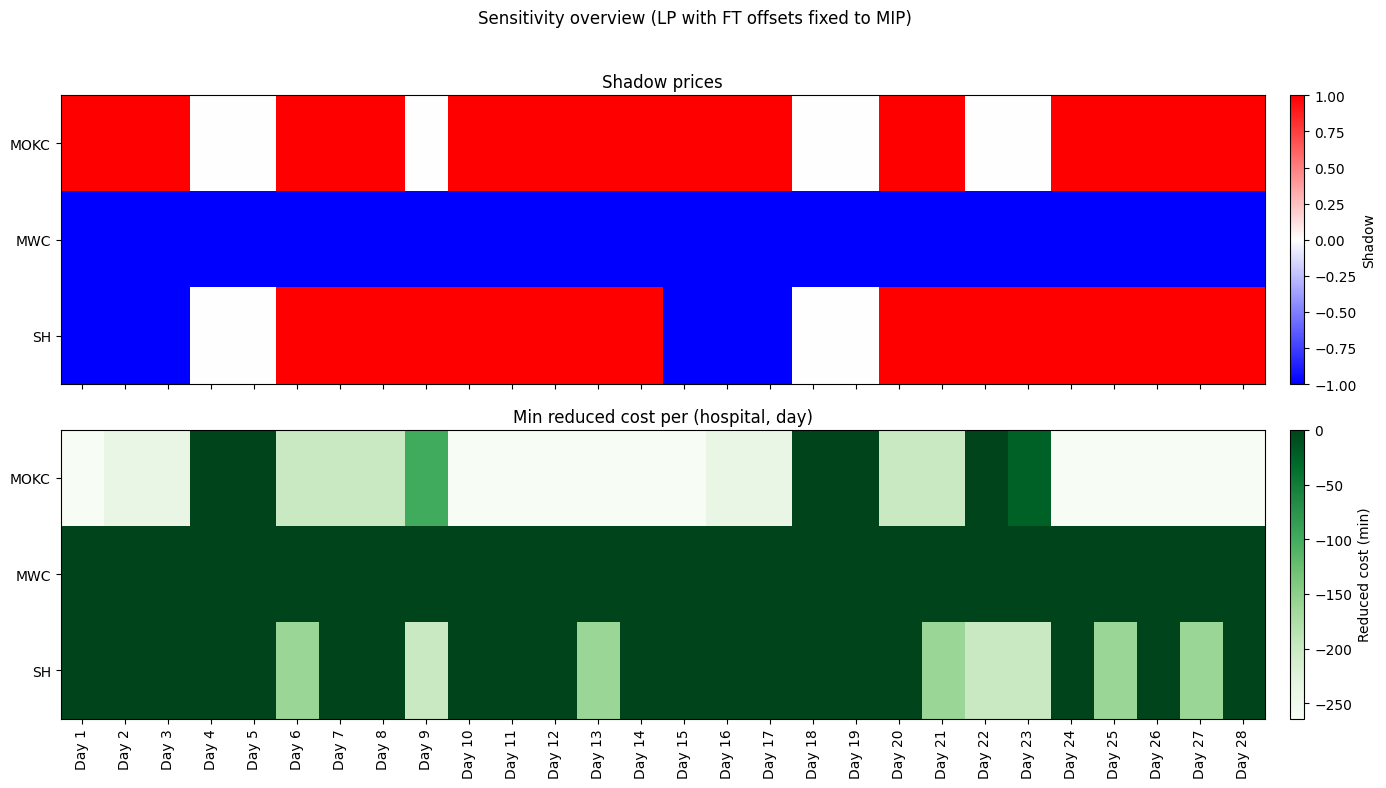

3


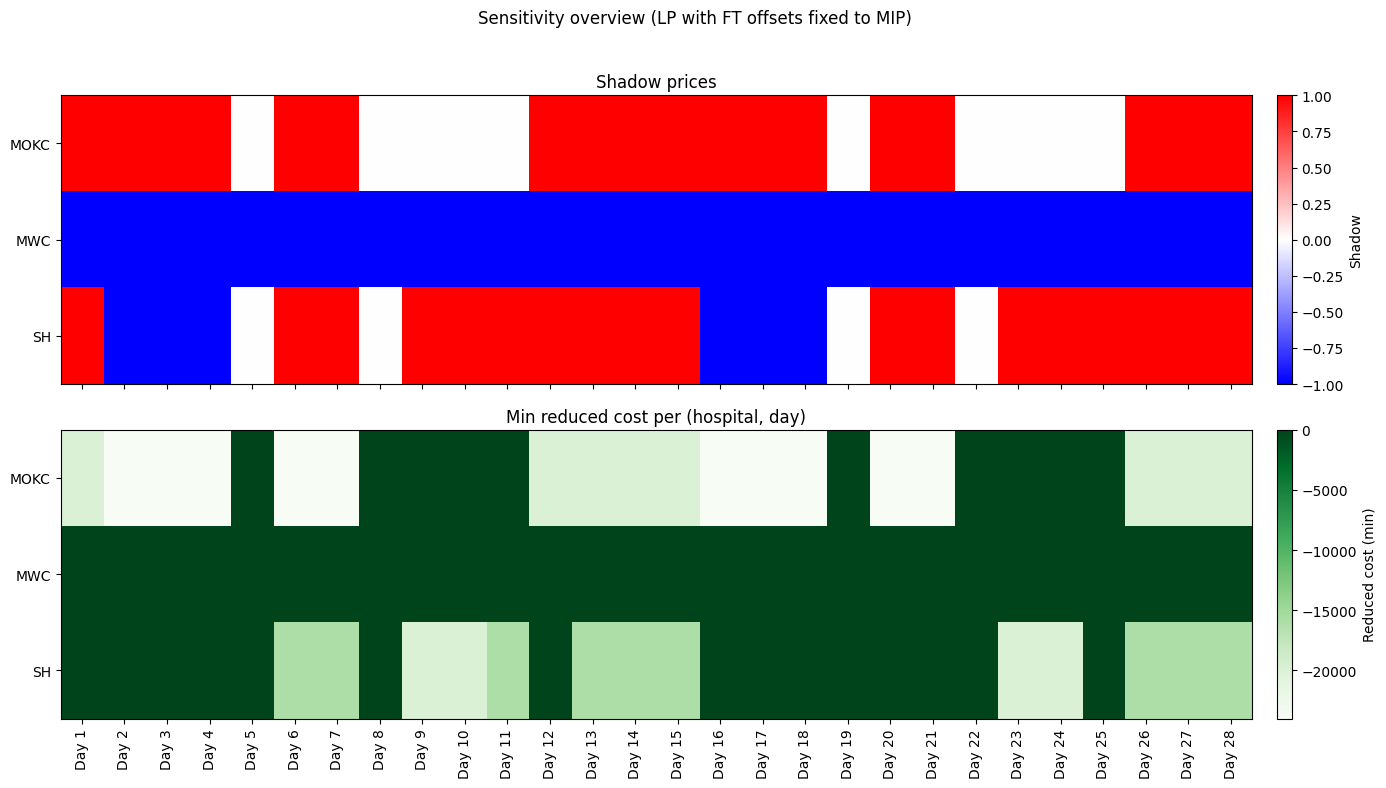

5


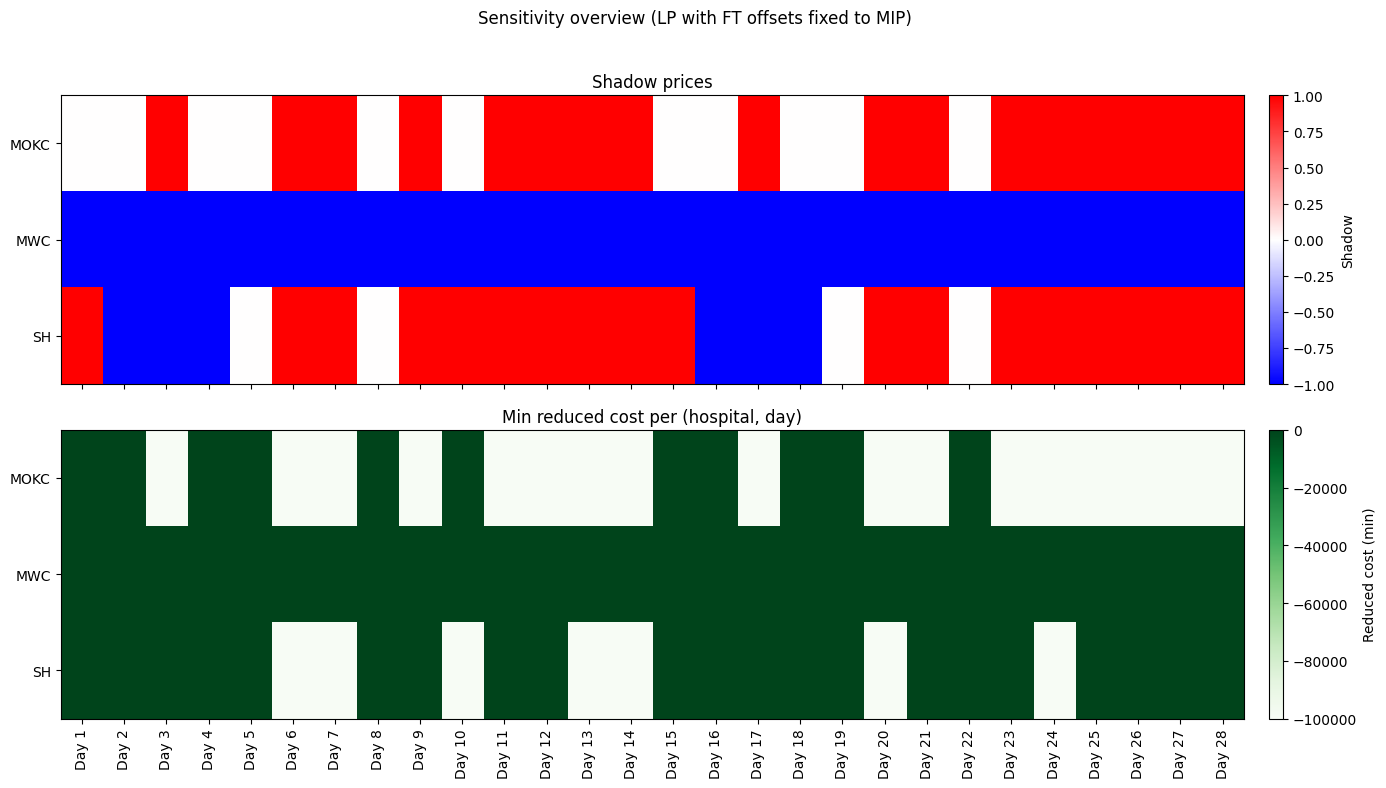

7


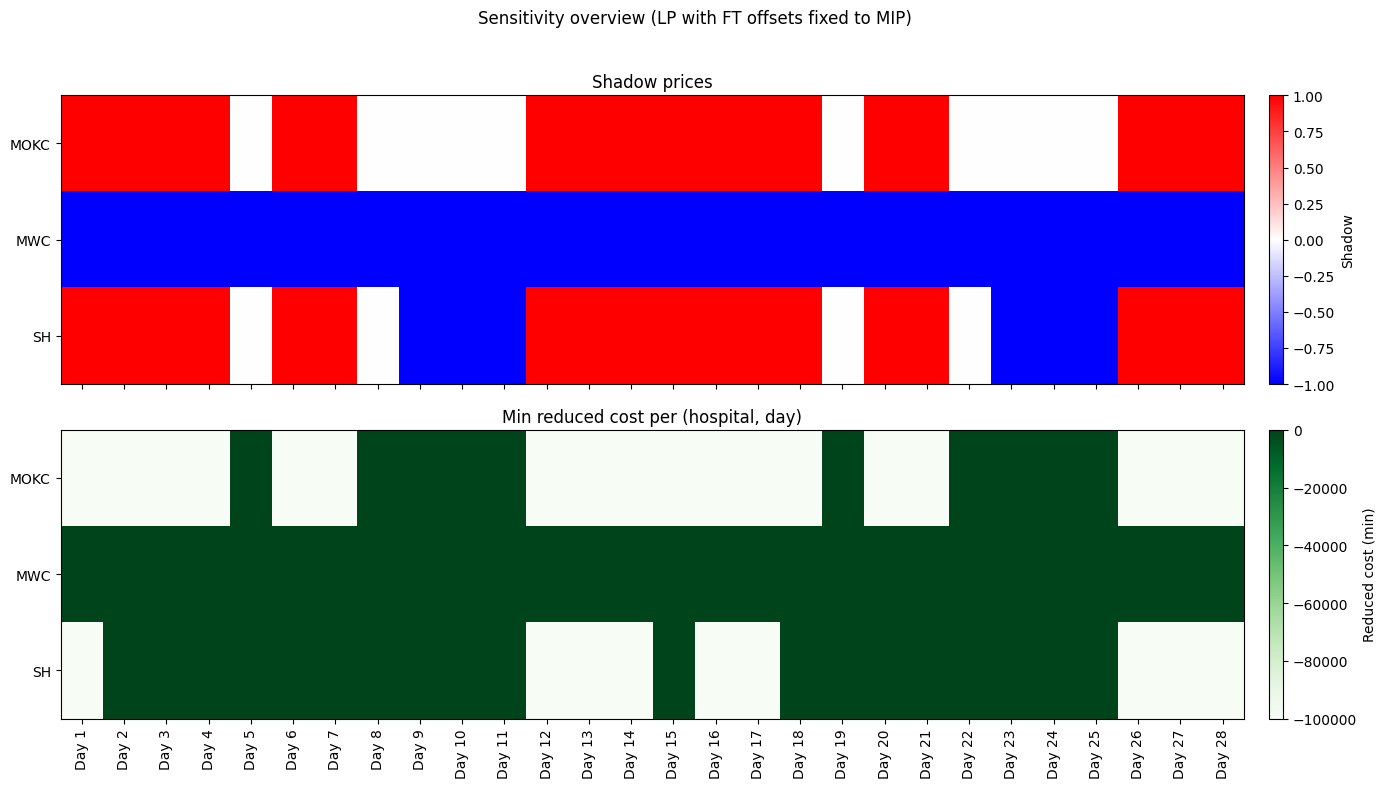

9


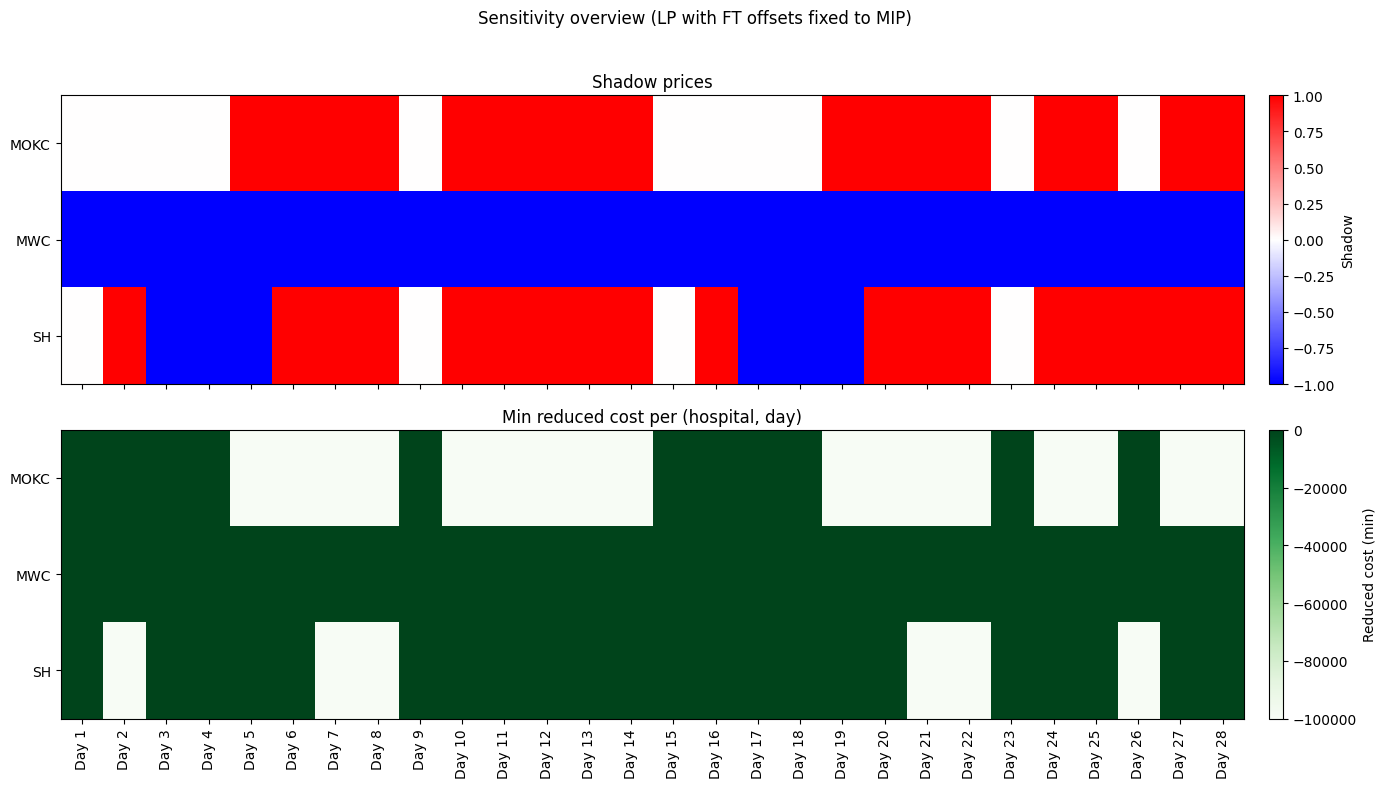

In [ ]:
results_ft1 = []
for E in tqdm(range(1,10, 2)):
    sched = HospitalistSchedulerLP(
        doctors=DEFAULT_DOCTORS,
        base_demand=DEFAULT_DEMAND,
        demand_scale=demand_scale,  # or daily_demand=...
        pen_under=1*10**E,
        pen_over=1,
        lambda_used=0.01,
        start_dow=0
    )

    sched.build()
    sched.solve_mip(msg=False, time_limit=300, rel_gap=0.001)
    status, duals, rcosts, lp_u, lp_o = lp_relaxation_duals(sched, fix_ft_offsets=True)
    sp = shadow_price_df(sched, duals)
    mr = min_reduced_cost_df(sched, rcosts, clip=1e5)
    results_ft1.append(
        [E, sp, mr, sched]
    )

# for r in results_ft1:
#     E, sp, mr, sched = tuple(r)
#     print(E)
#     plot_sensitivity(sched, sp, mr, normalize=False)
    

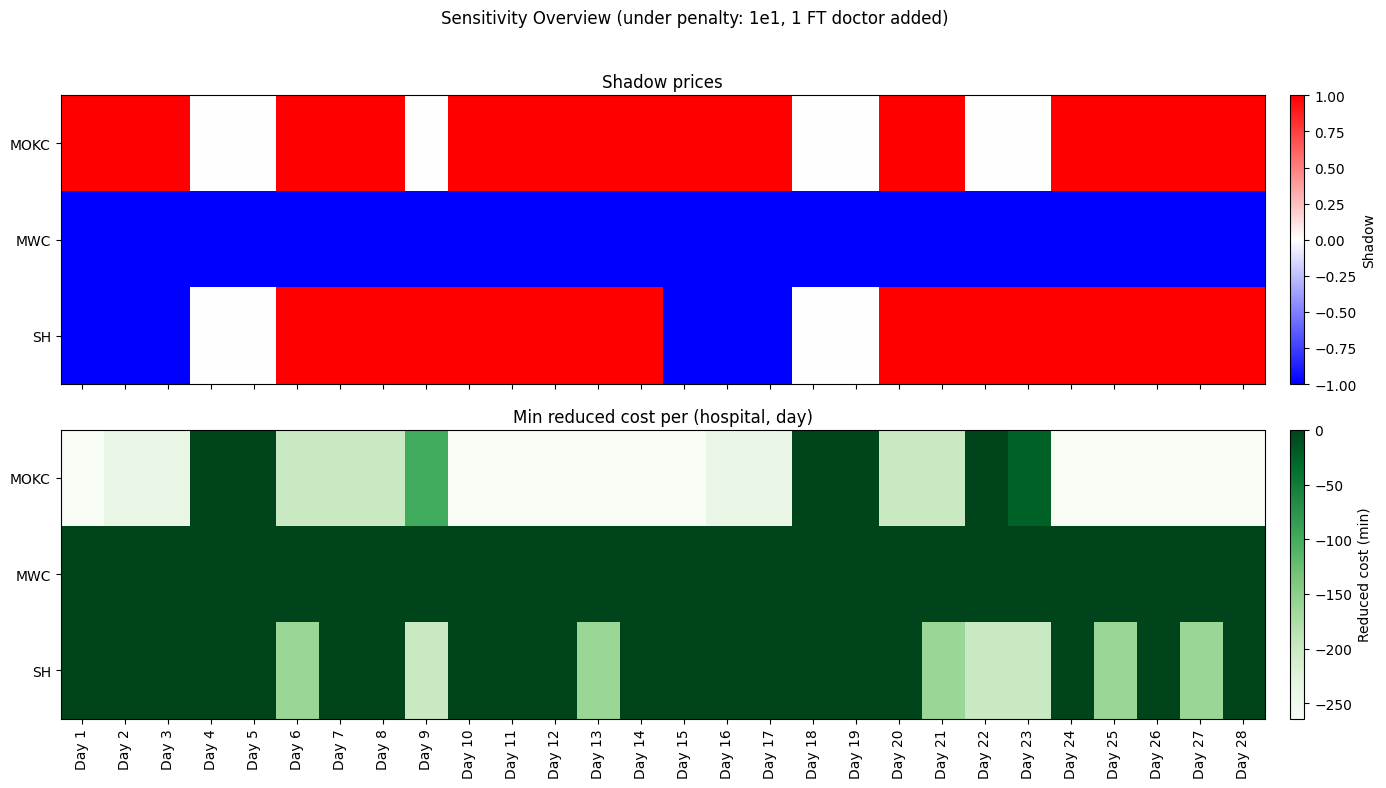

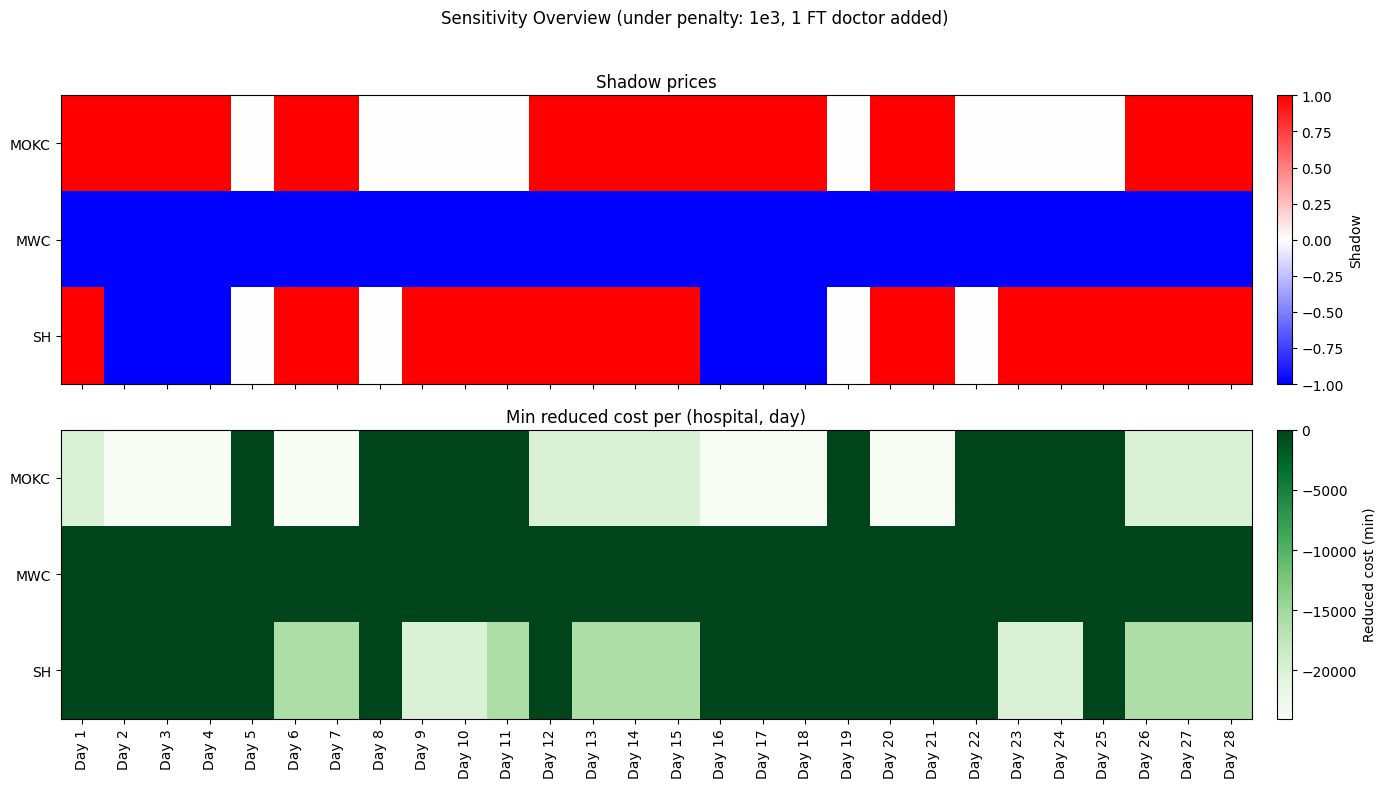

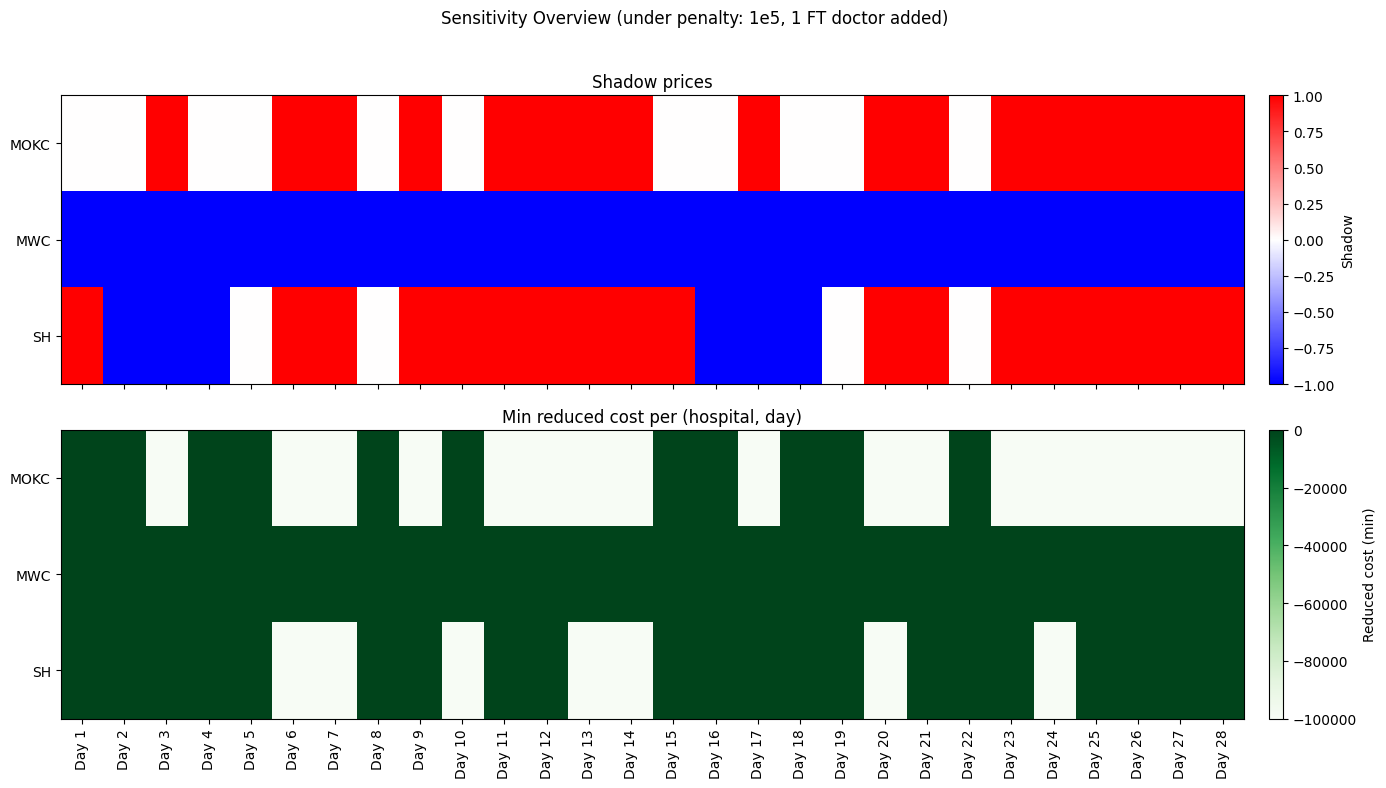

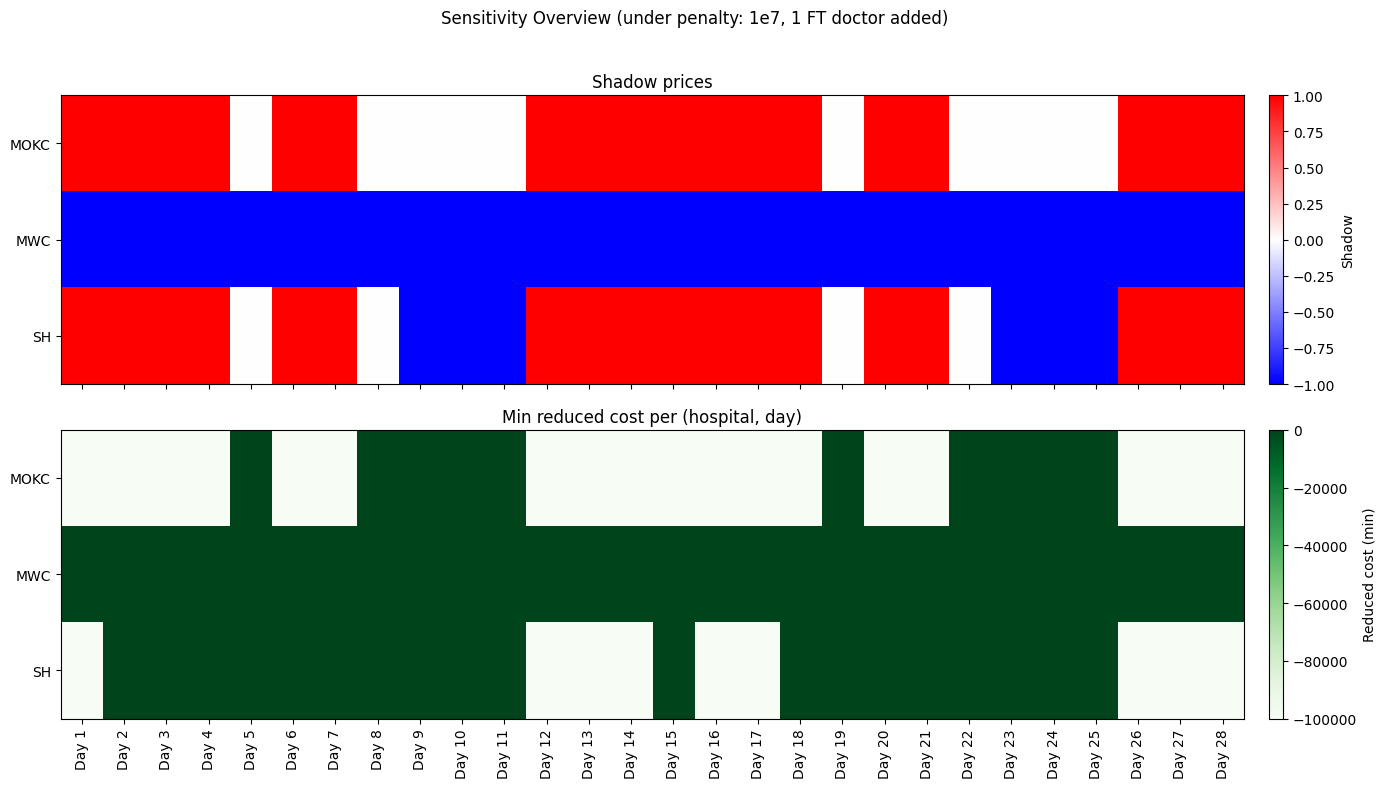

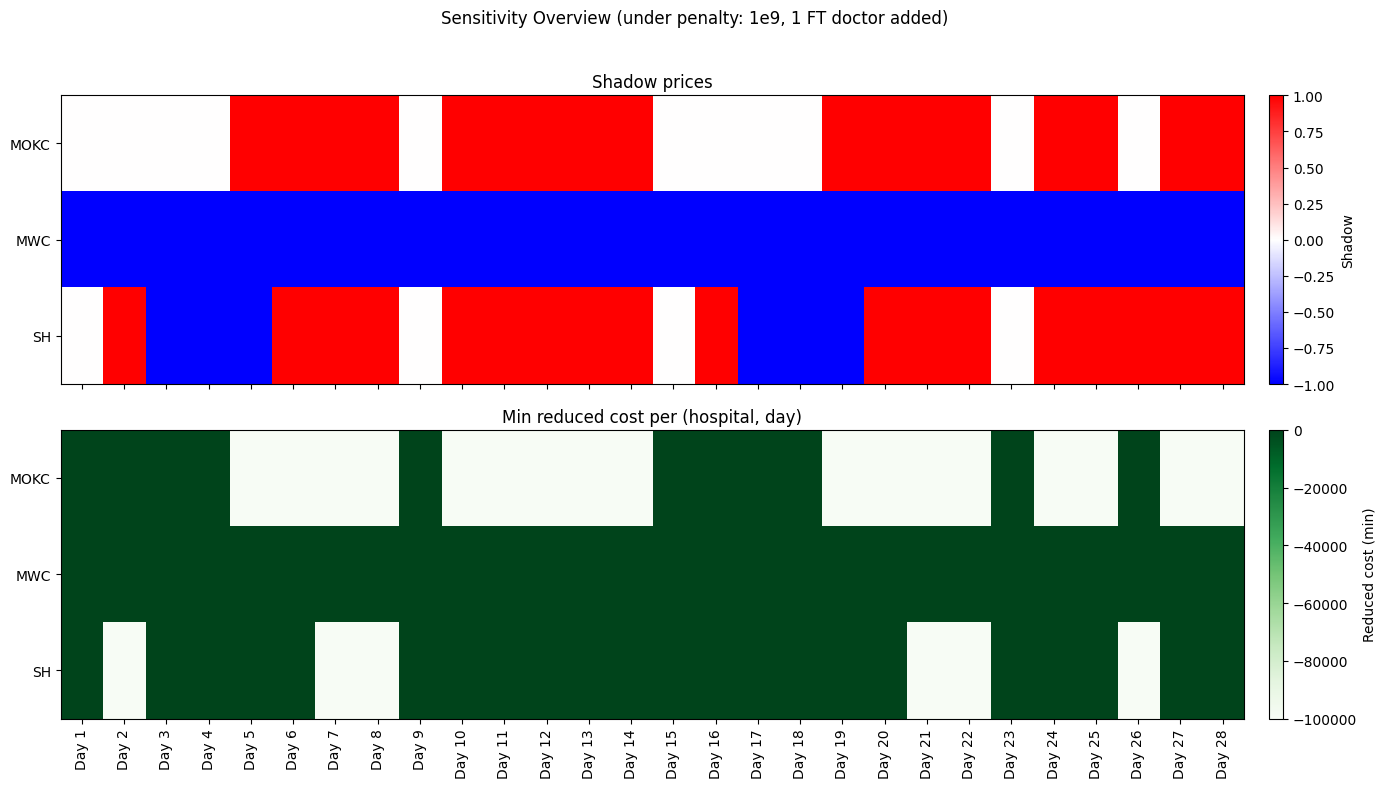

In [81]:
for r in results_ft1:
    E, sp, mr, sched = tuple(r)
    title = f"Sensitivity Overview (under penalty: 1e{E}, 1 FT doctor added)"
    plot_sensitivity(sched, sp, mr, normalize=False, suptitle=title)

In [73]:
DEFAULT_DOCTORS['FT2'] = {
    'patients': 20,
    'MOKC': 1, 'SH': 1, 'MWC':1,
    'type': 'FT'
}

100%|██████████| 5/5 [15:31<00:00, 186.33s/it]


1


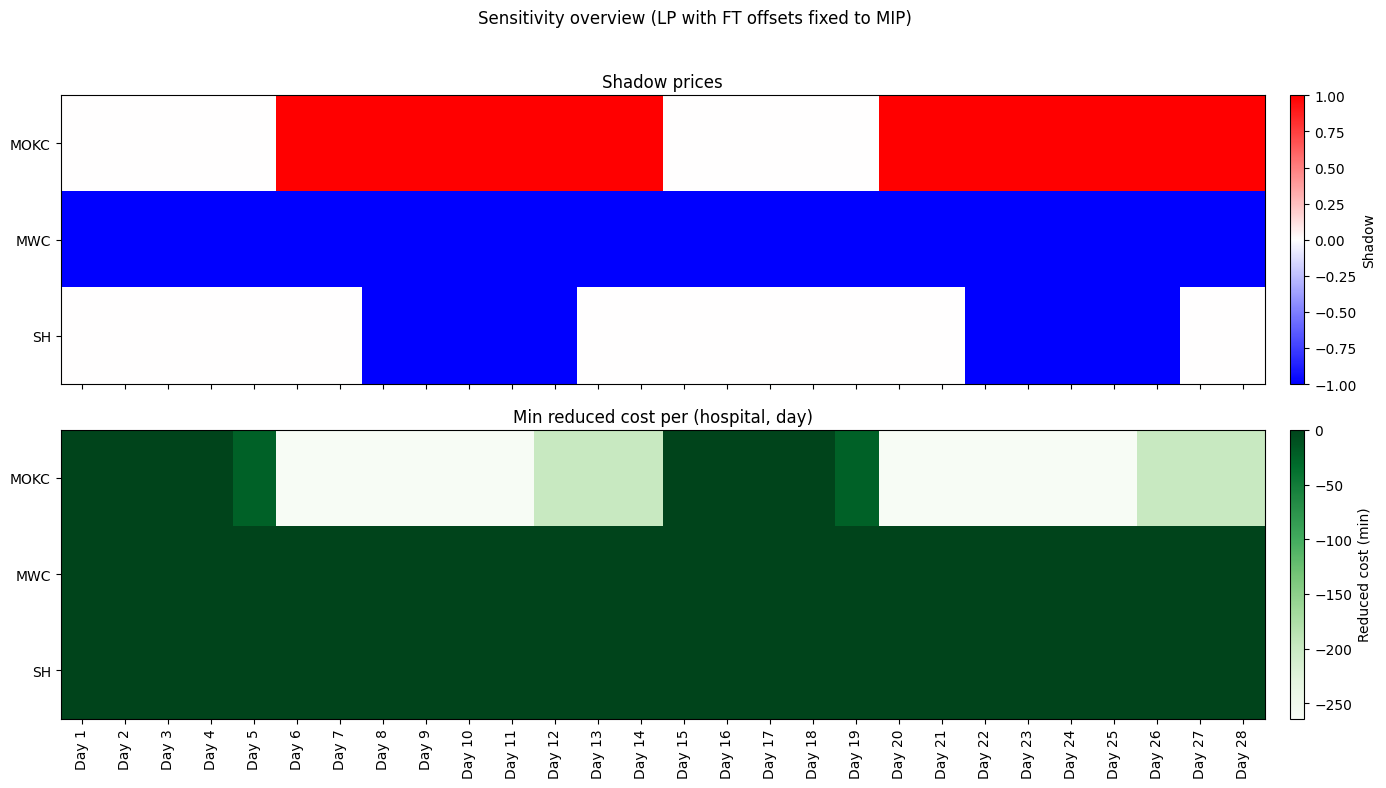

3


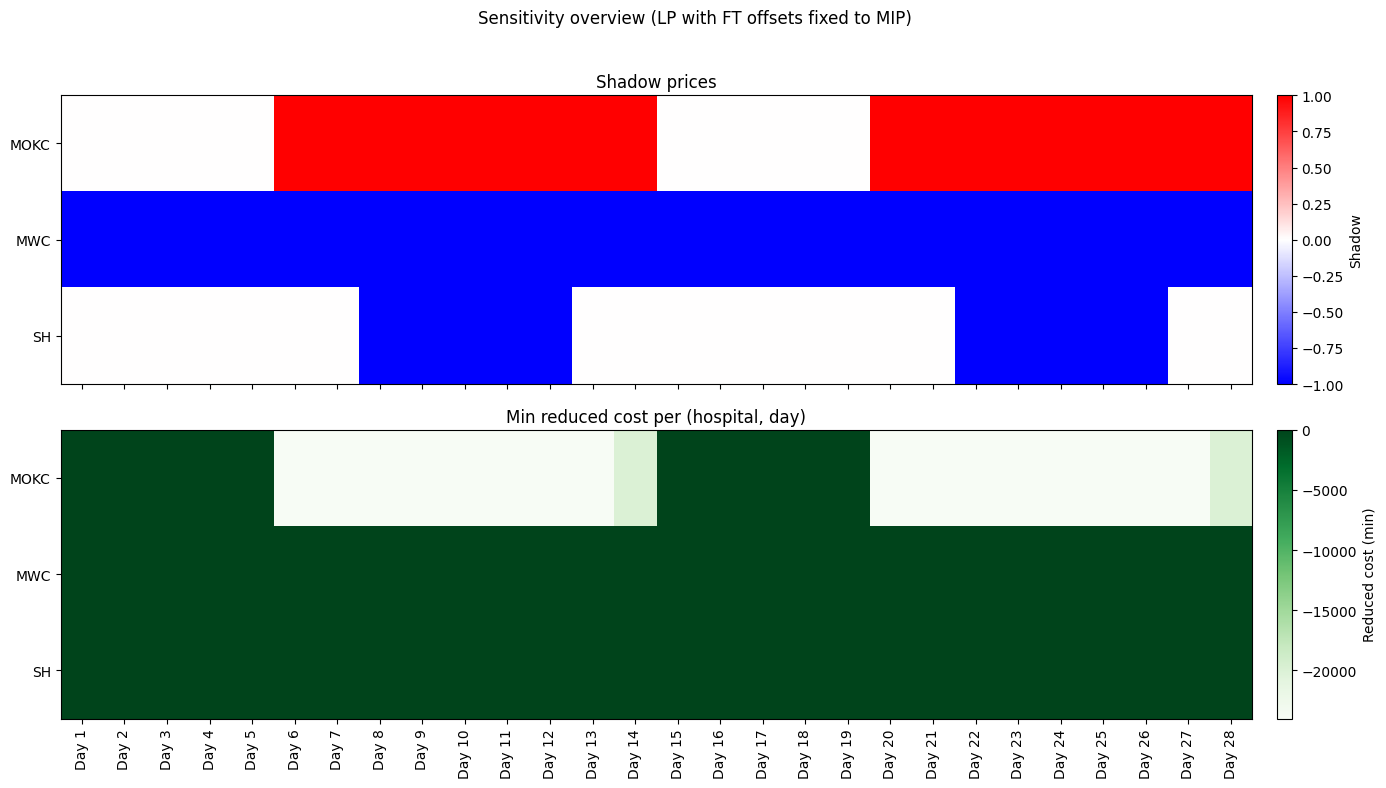

5


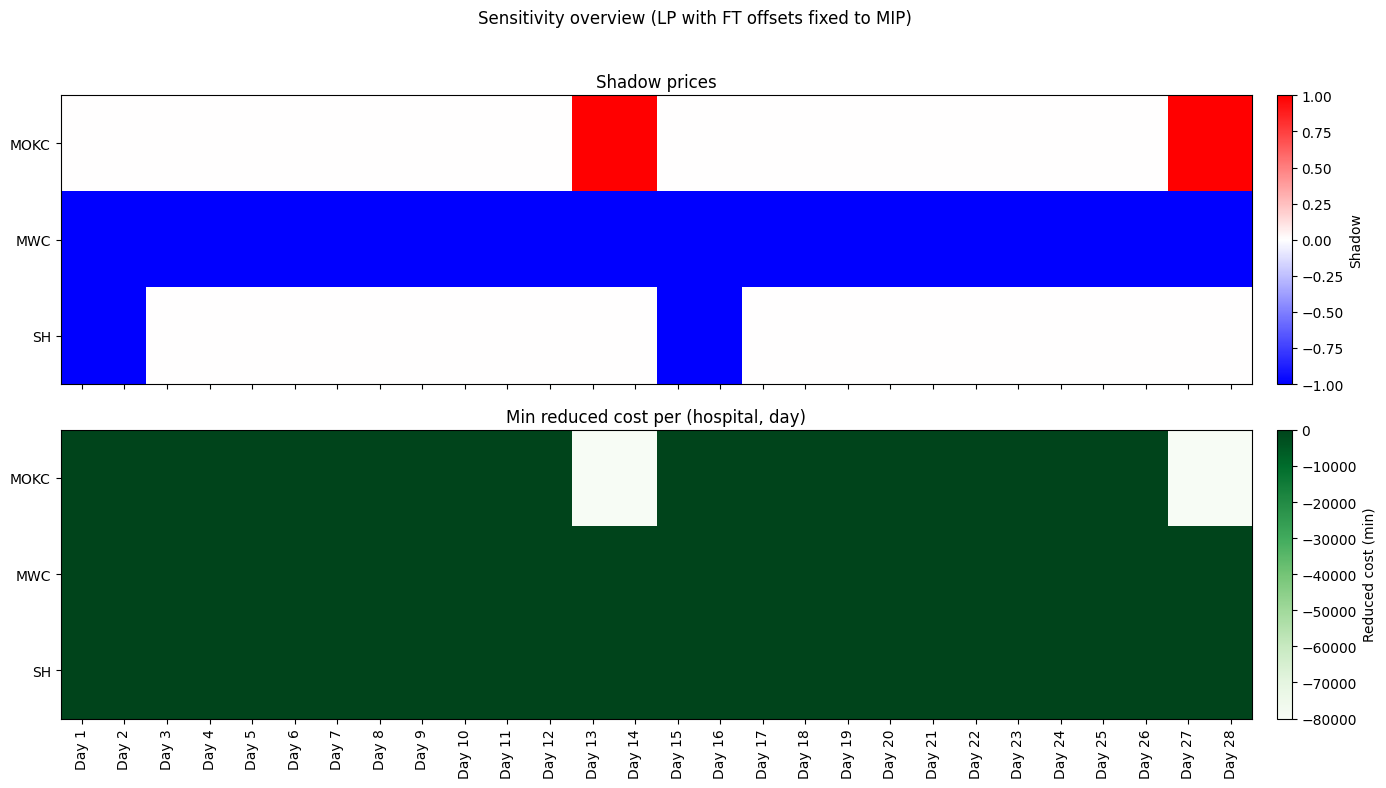

7


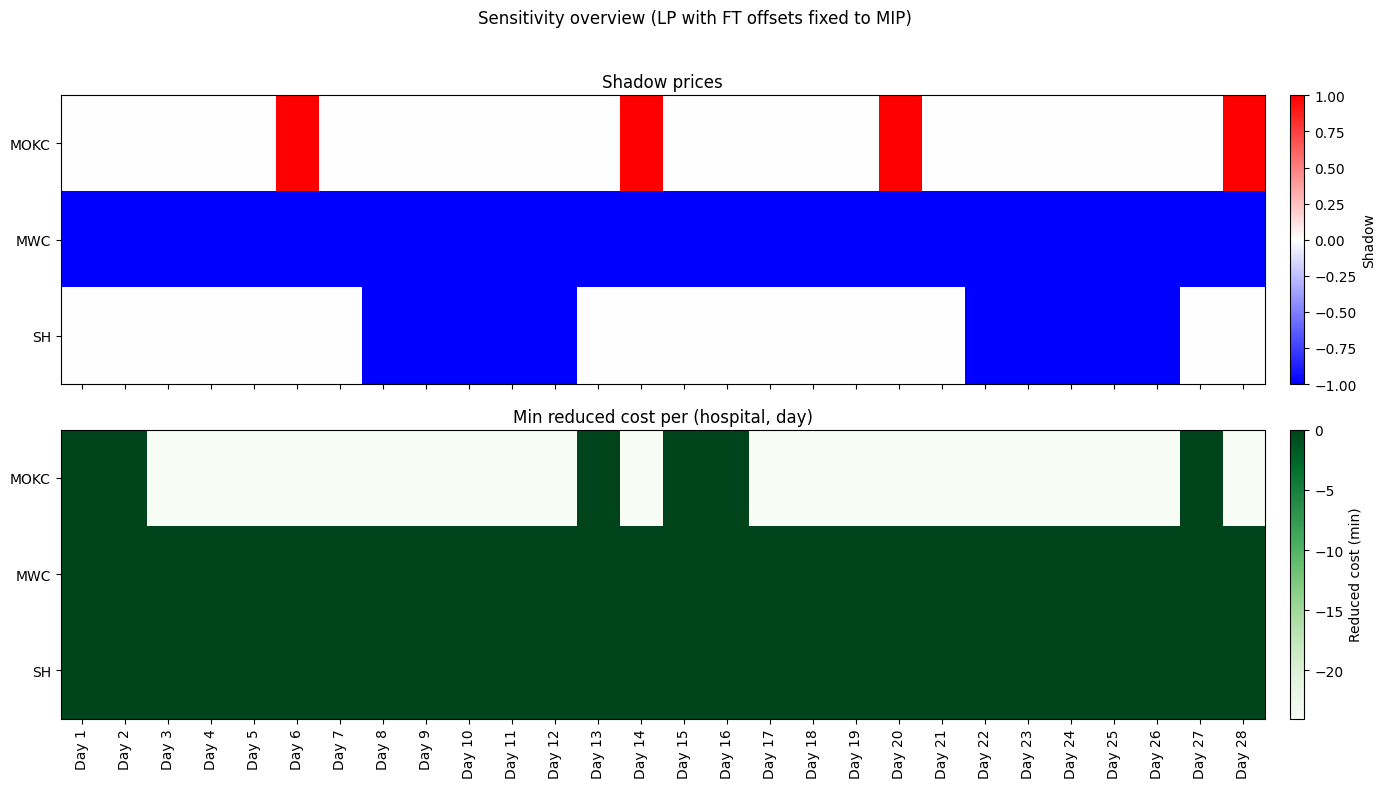

9


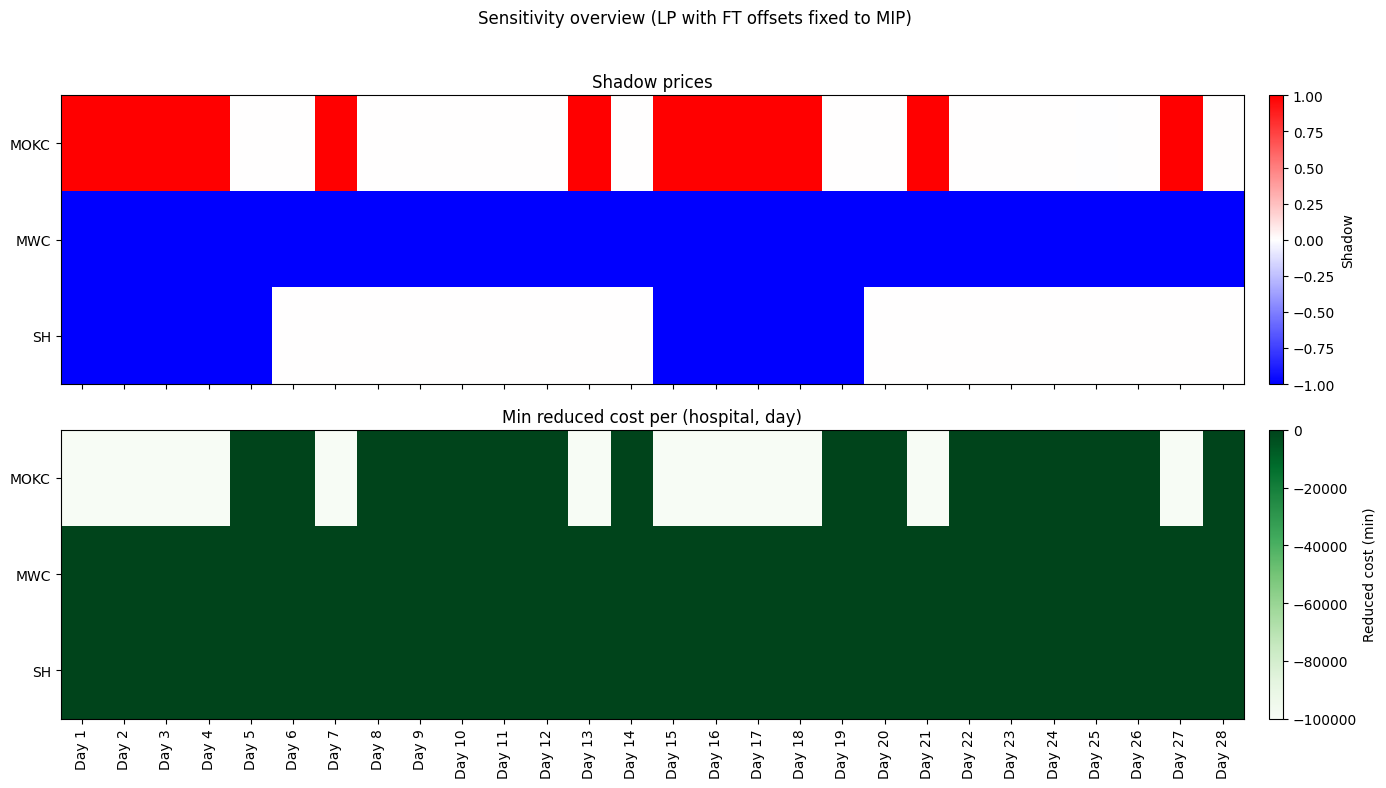

In [74]:
results_ft2 = []
for E in tqdm(range(1,10, 2)):
    sched = HospitalistSchedulerLP(
        doctors=DEFAULT_DOCTORS,
        base_demand=DEFAULT_DEMAND,
        demand_scale=demand_scale,  # or daily_demand=...
        pen_under=1*10**E,
        pen_over=1,
        lambda_used=0.01,
        start_dow=0
    )

    sched.build()
    sched.solve_mip(msg=False, time_limit=300, rel_gap=0.001)
    status, duals, rcosts, lp_u, lp_o = lp_relaxation_duals(sched, fix_ft_offsets=True)
    sp = shadow_price_df(sched, duals)
    mr = min_reduced_cost_df(sched, rcosts, clip=1e5)
    results_ft2.append(
        [E, sp, mr, sched]
    )

for r in results_ft2:
    E, sp, mr, sched = tuple(r)
    print(E)
    plot_sensitivity(sched, sp, mr, normalize=False)
    

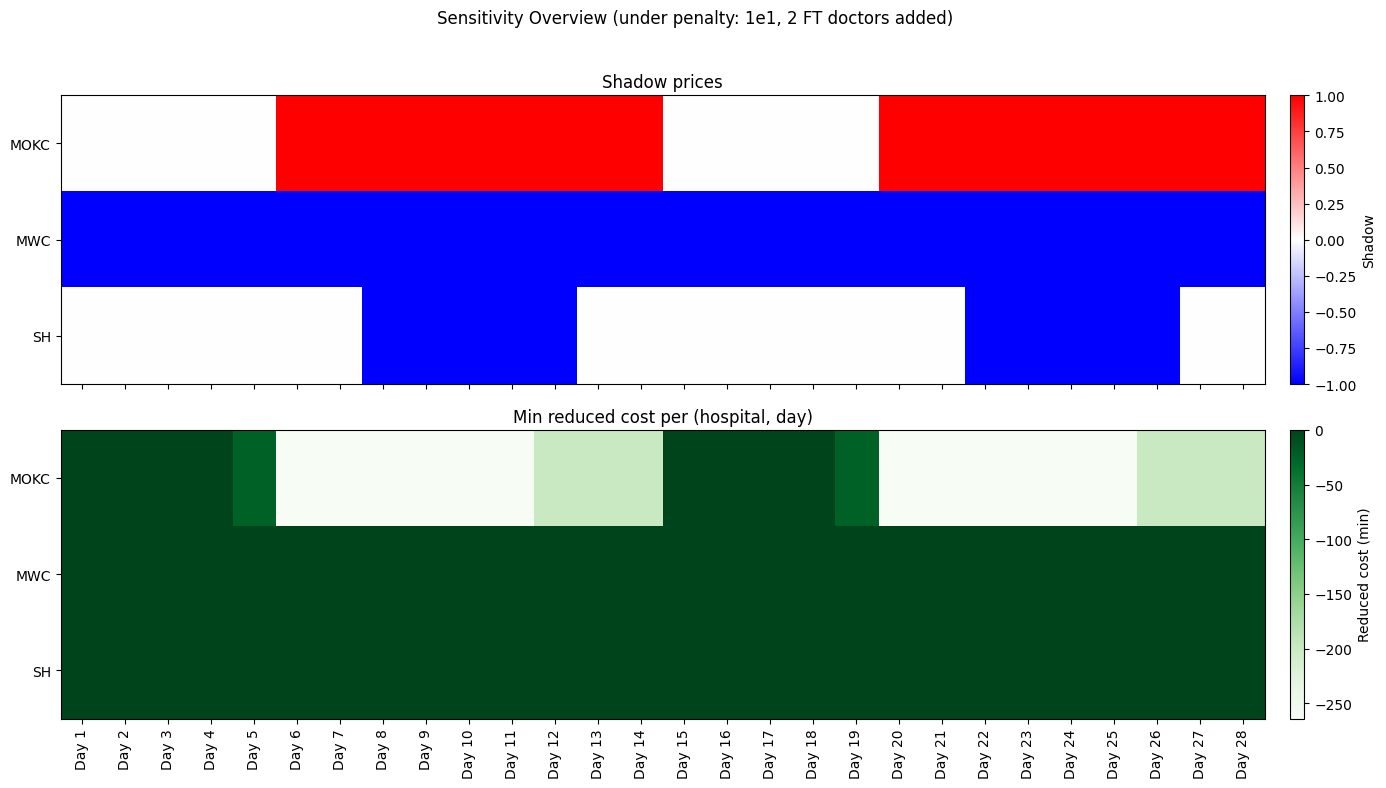

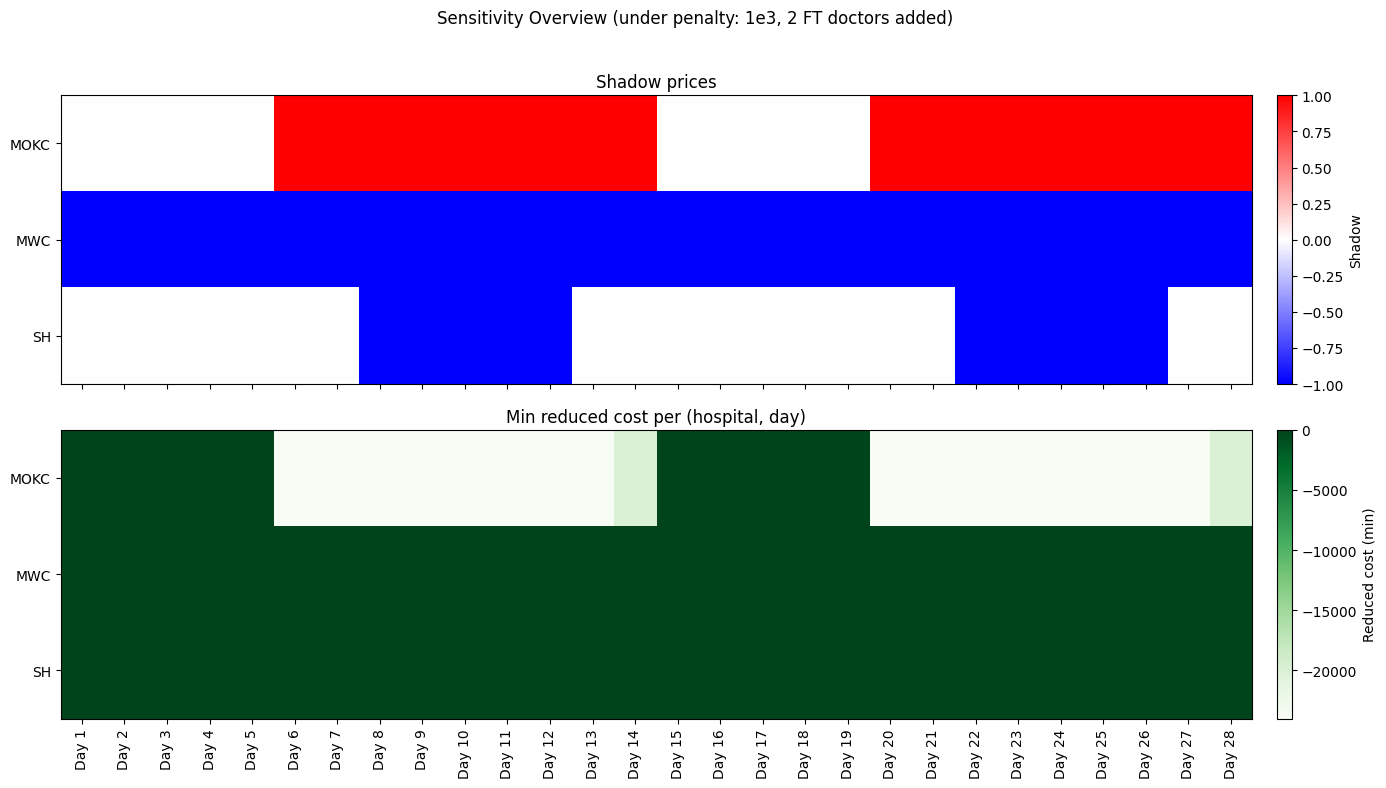

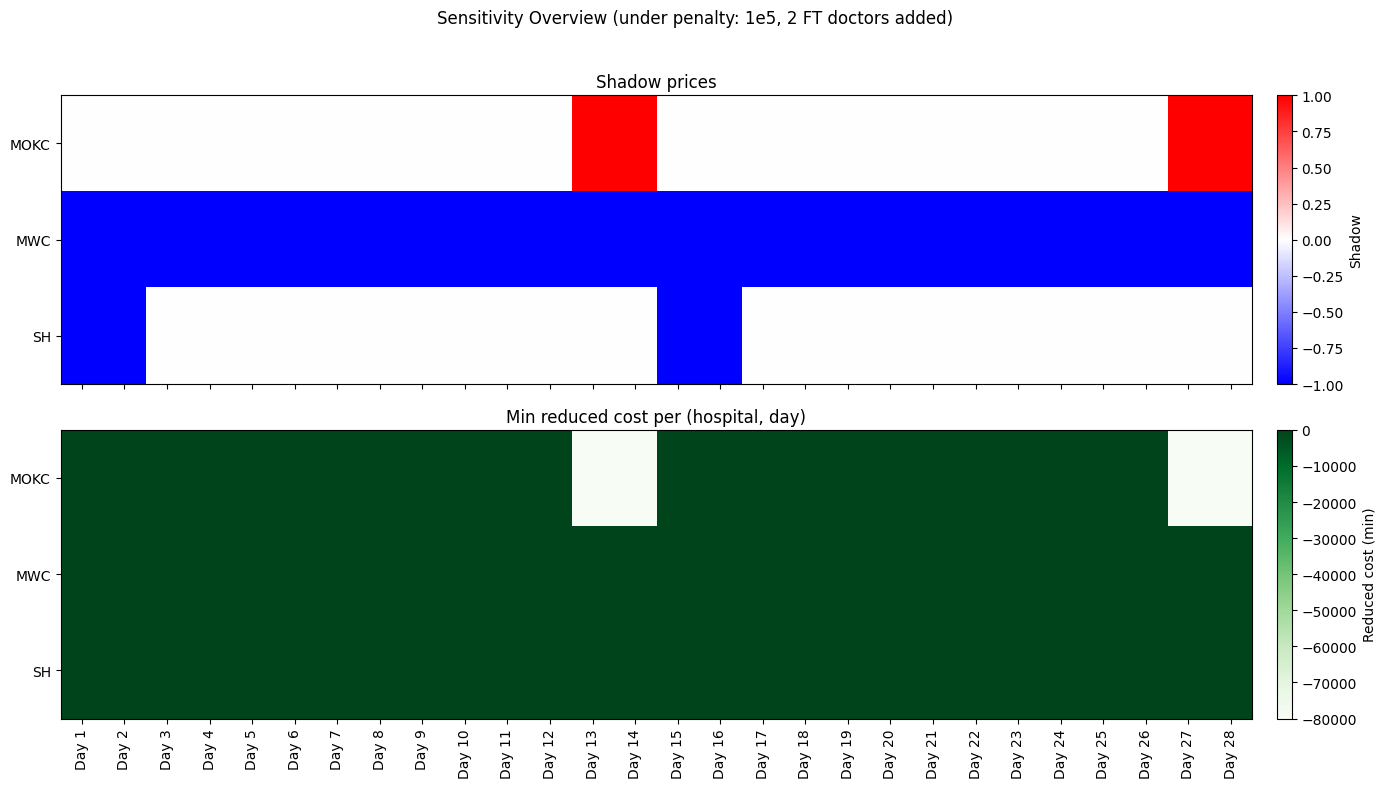

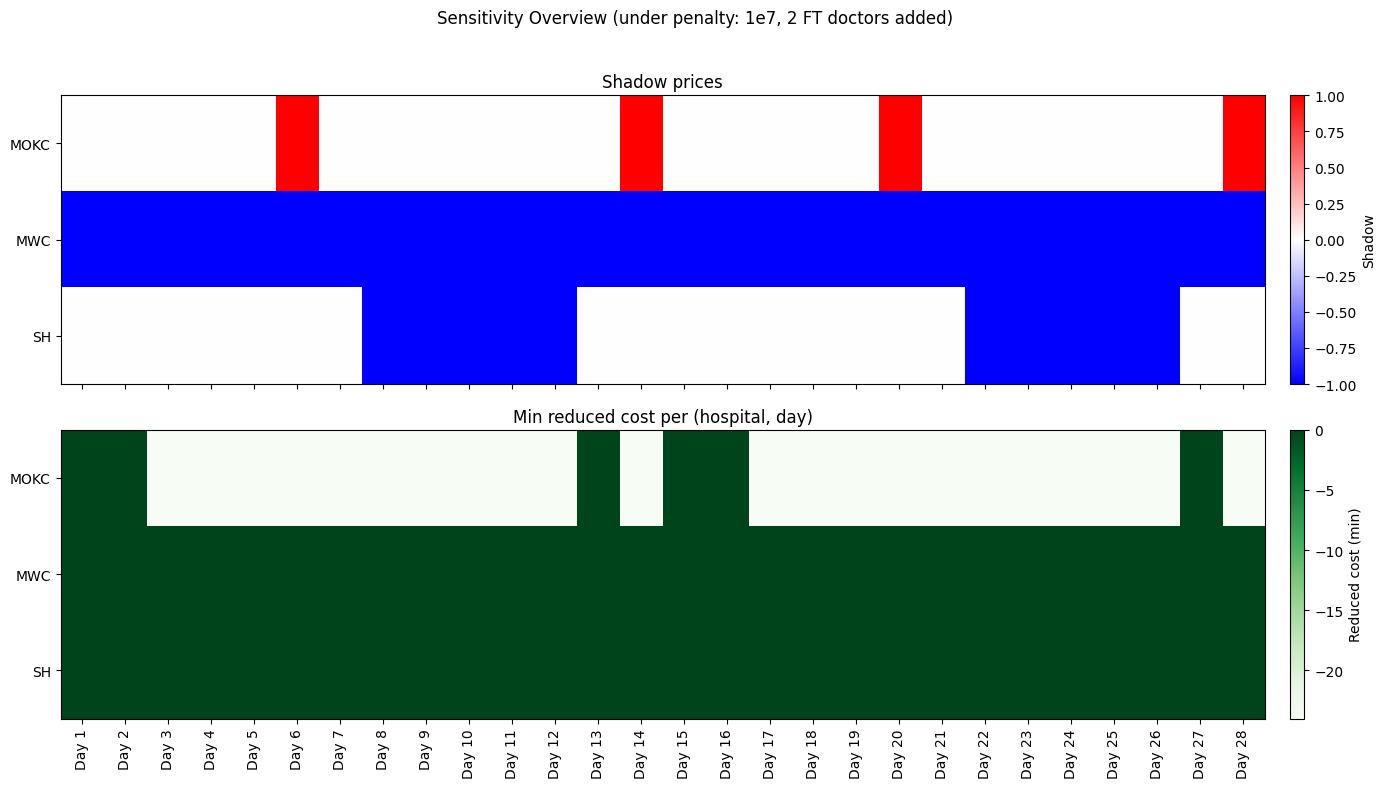

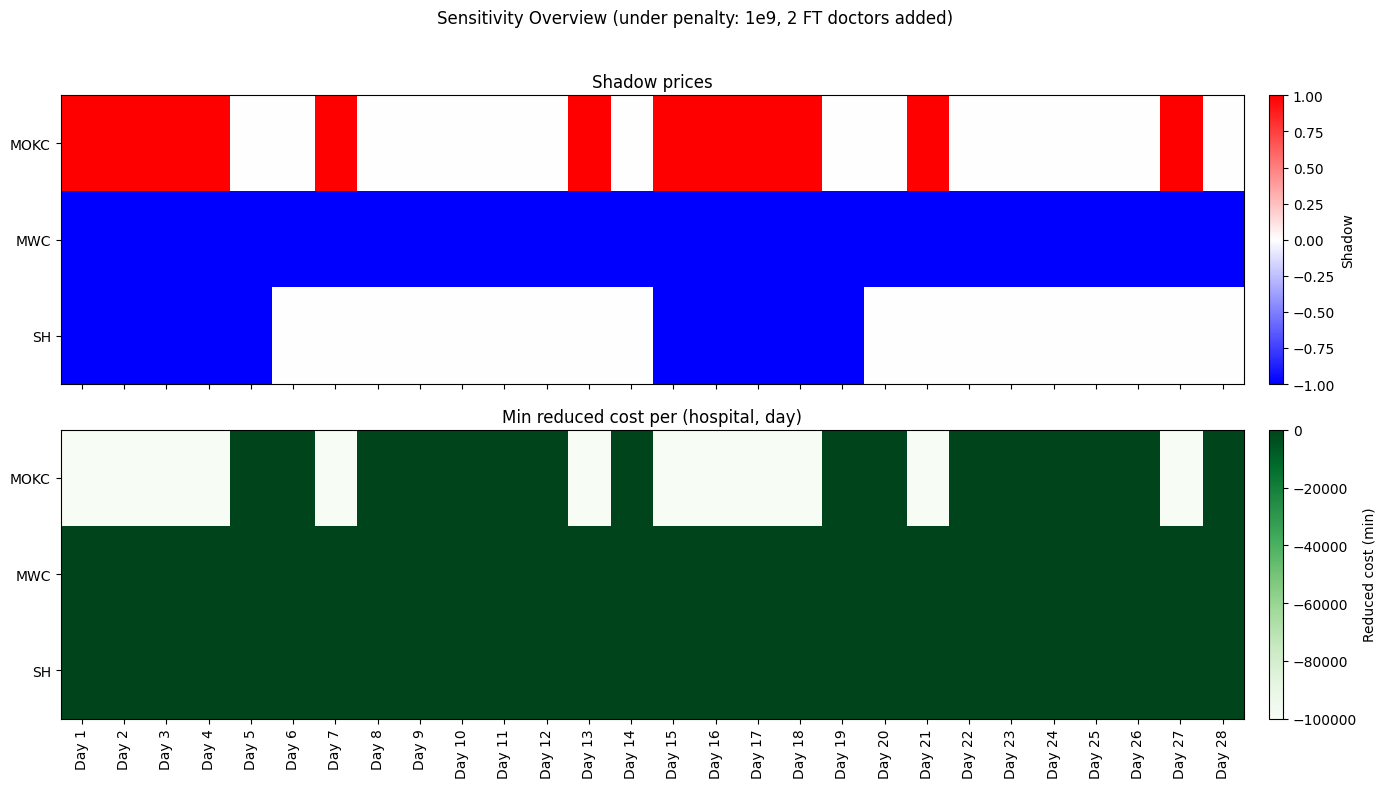

In [82]:
for r in results_ft2:
    E, sp, mr, sched = tuple(r)
    title = f"Sensitivity Overview (under penalty: 1e{E}, 2 FT doctors added)"
    plot_sensitivity(sched, sp, mr, normalize=False, suptitle=title)

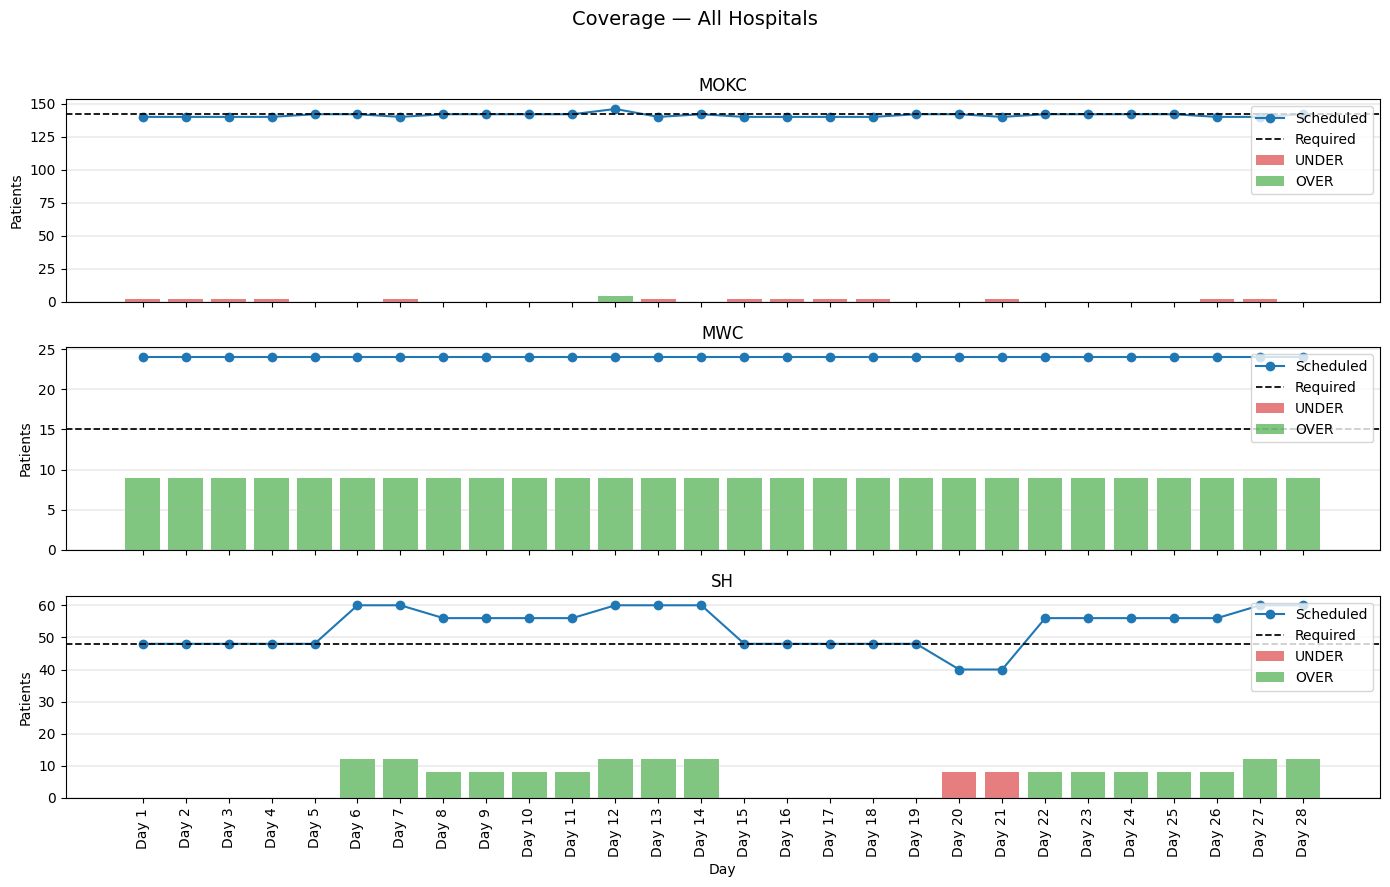

In [76]:
sched.plot_coverage()

0 added doctor(s), under_penalty: 1e1


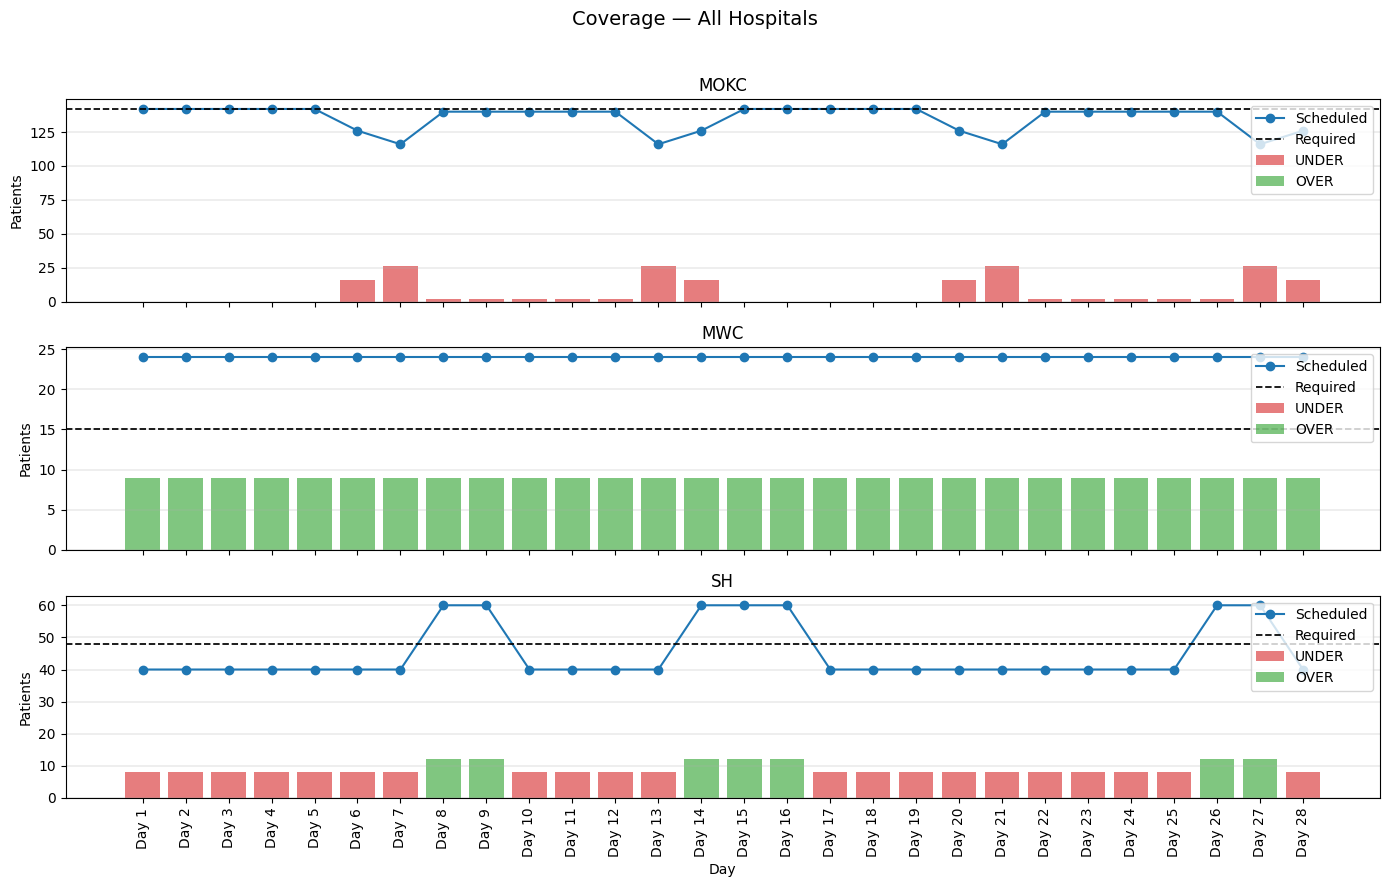

0 added doctor(s), under_penalty: 1e3


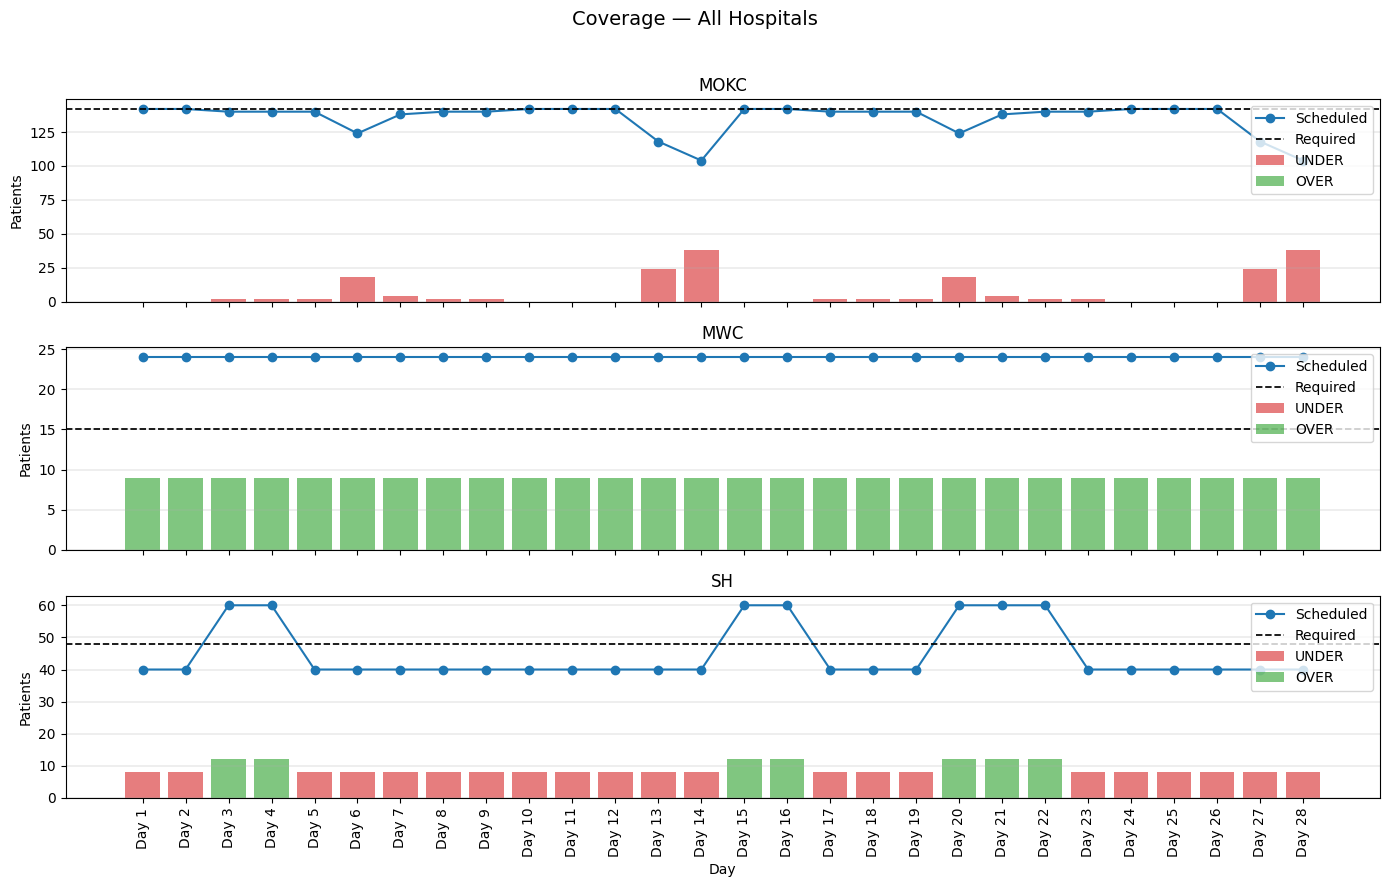

0 added doctor(s), under_penalty: 1e5


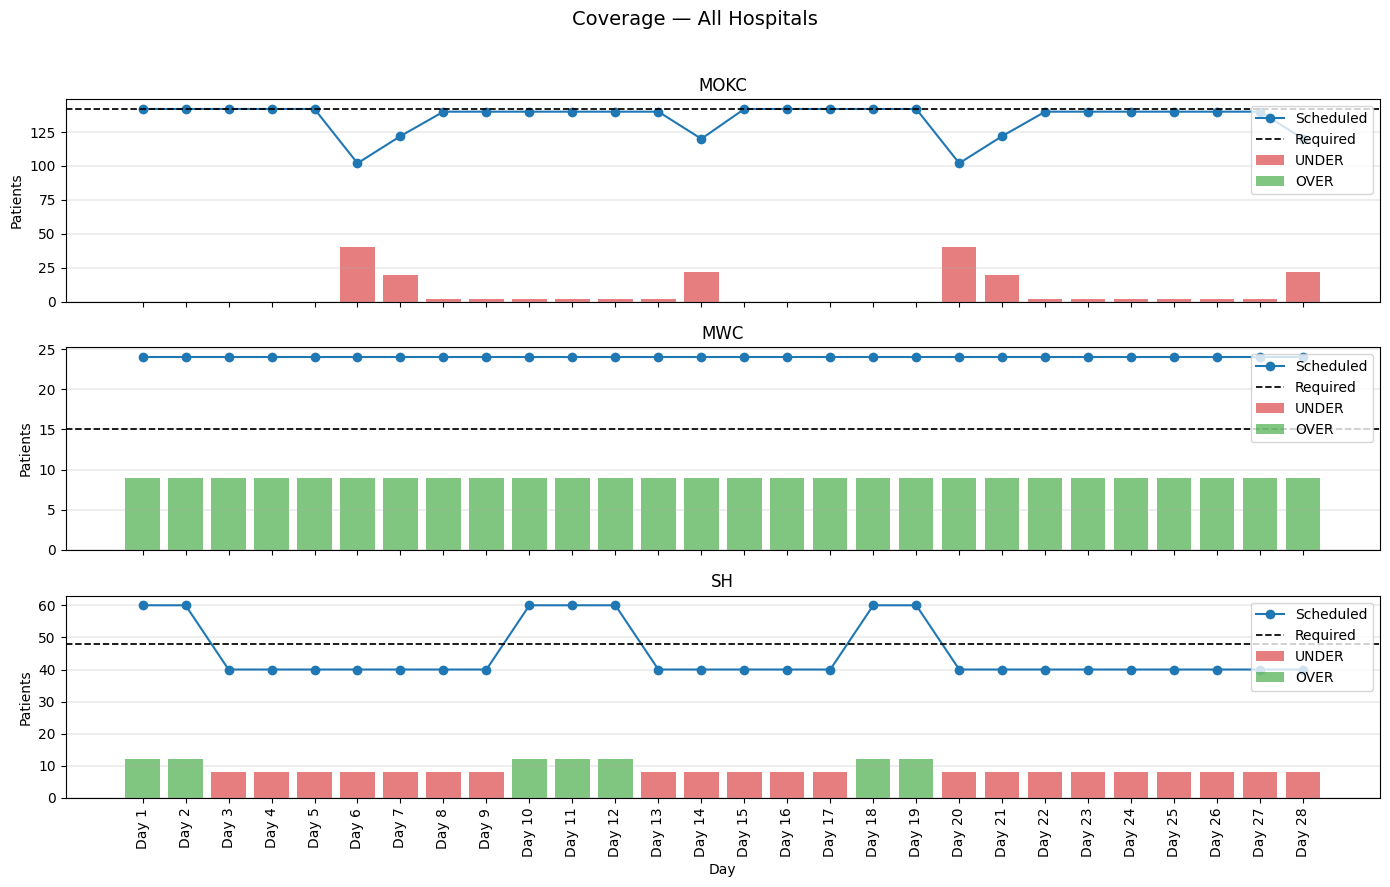

0 added doctor(s), under_penalty: 1e7


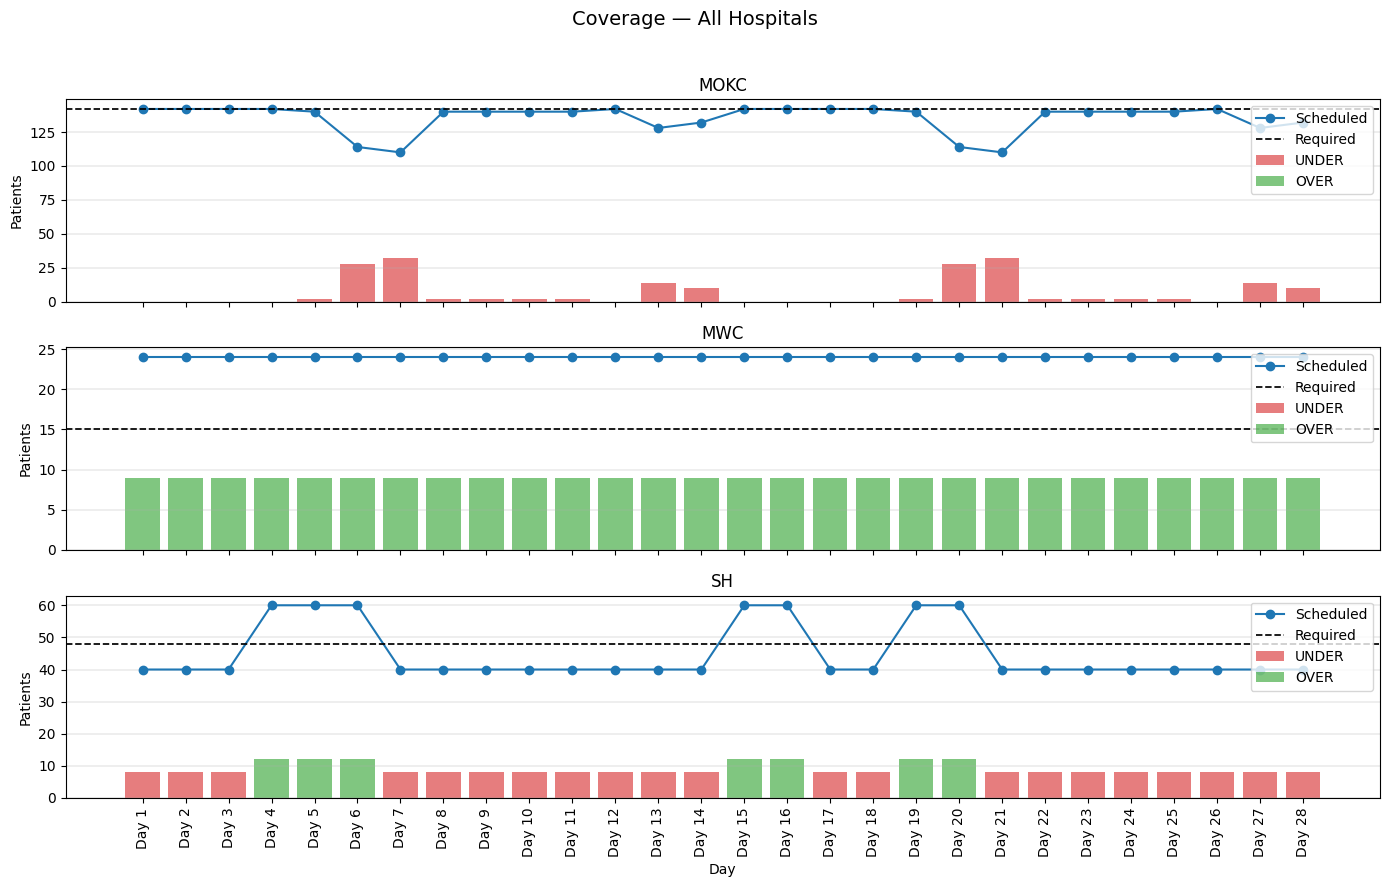

0 added doctor(s), under_penalty: 1e9


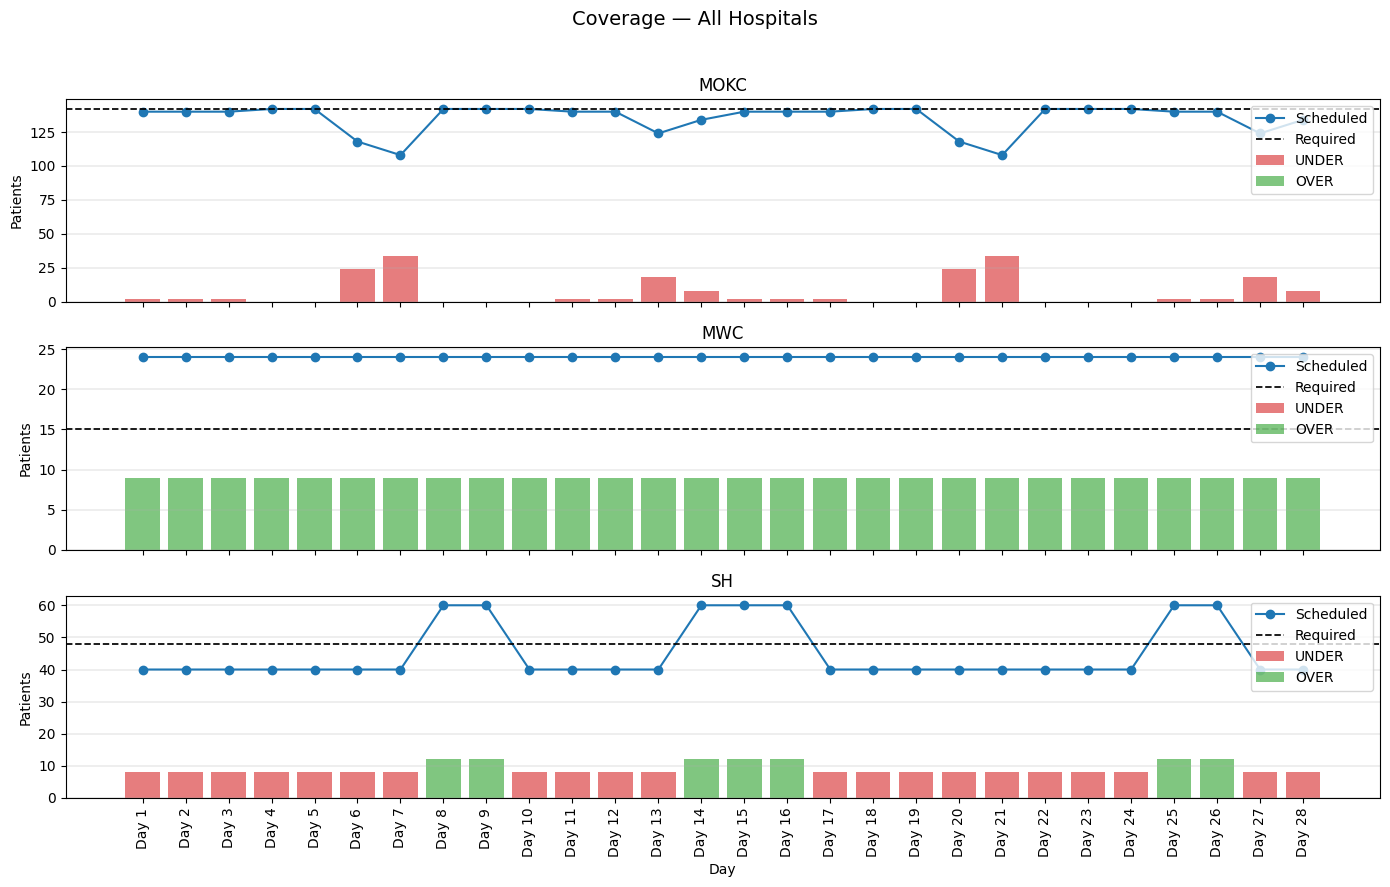

1 added doctor(s), under_penalty: 1e1


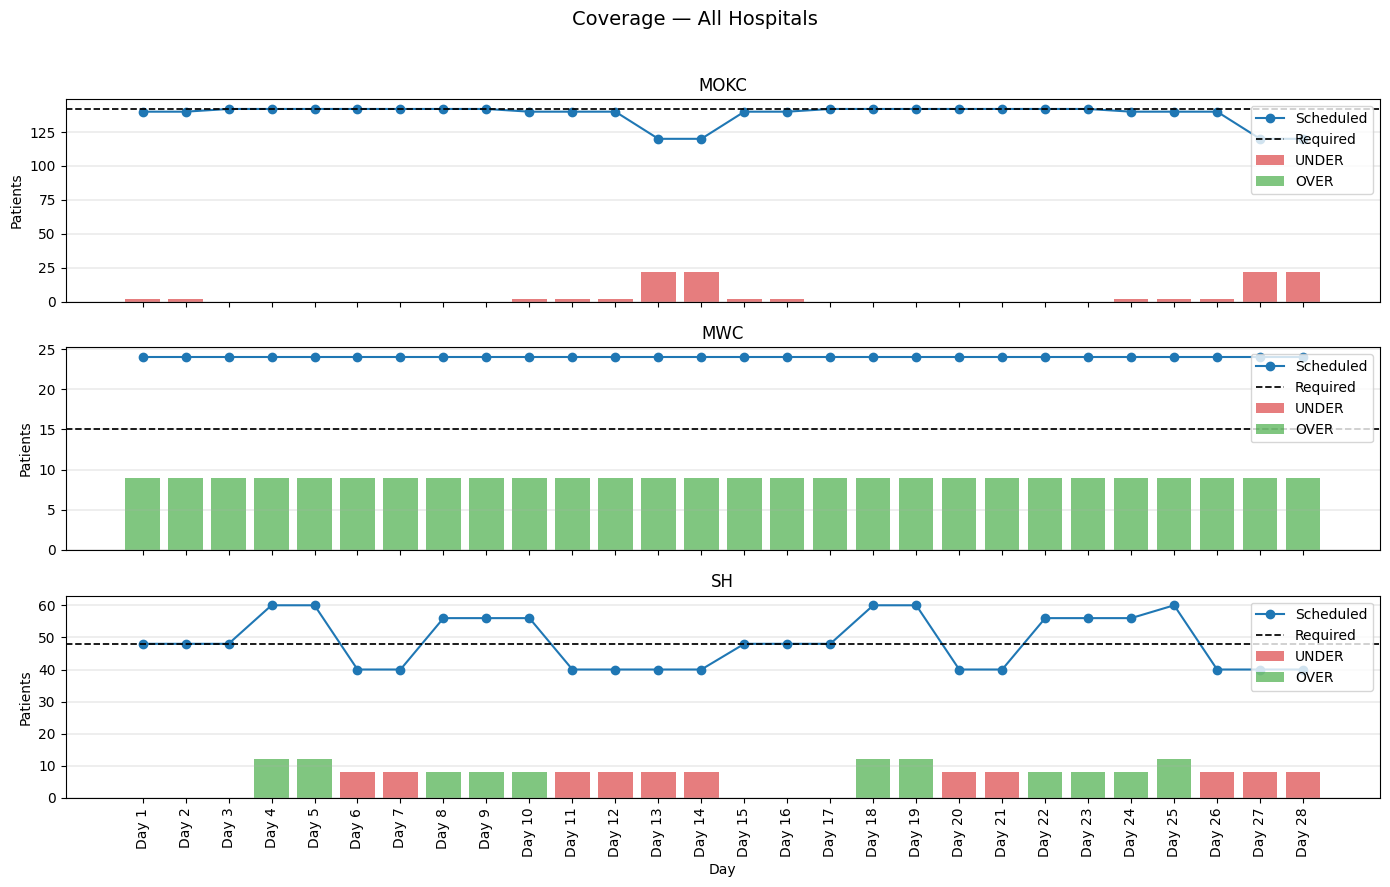

1 added doctor(s), under_penalty: 1e3


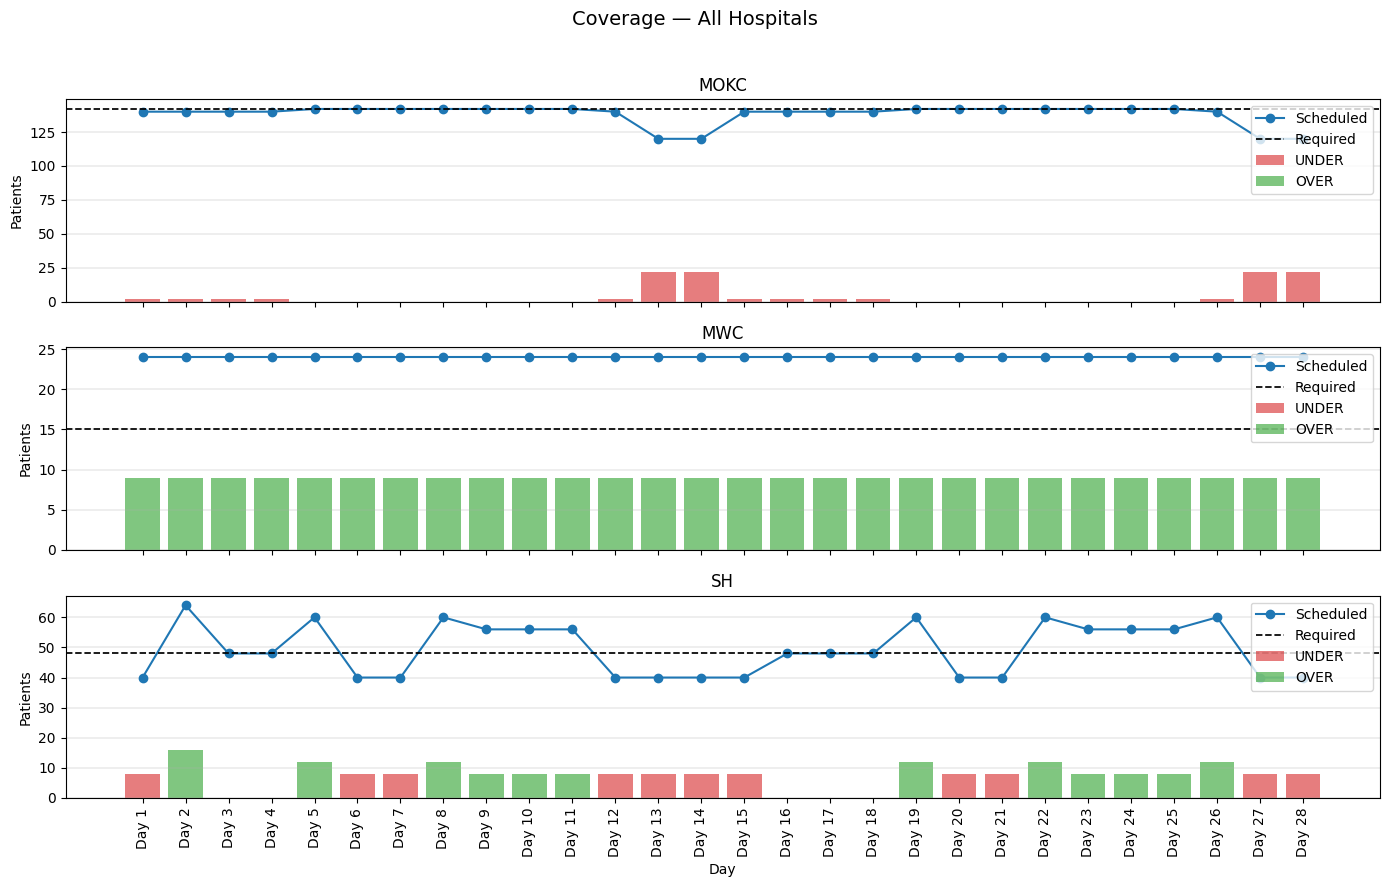

1 added doctor(s), under_penalty: 1e5


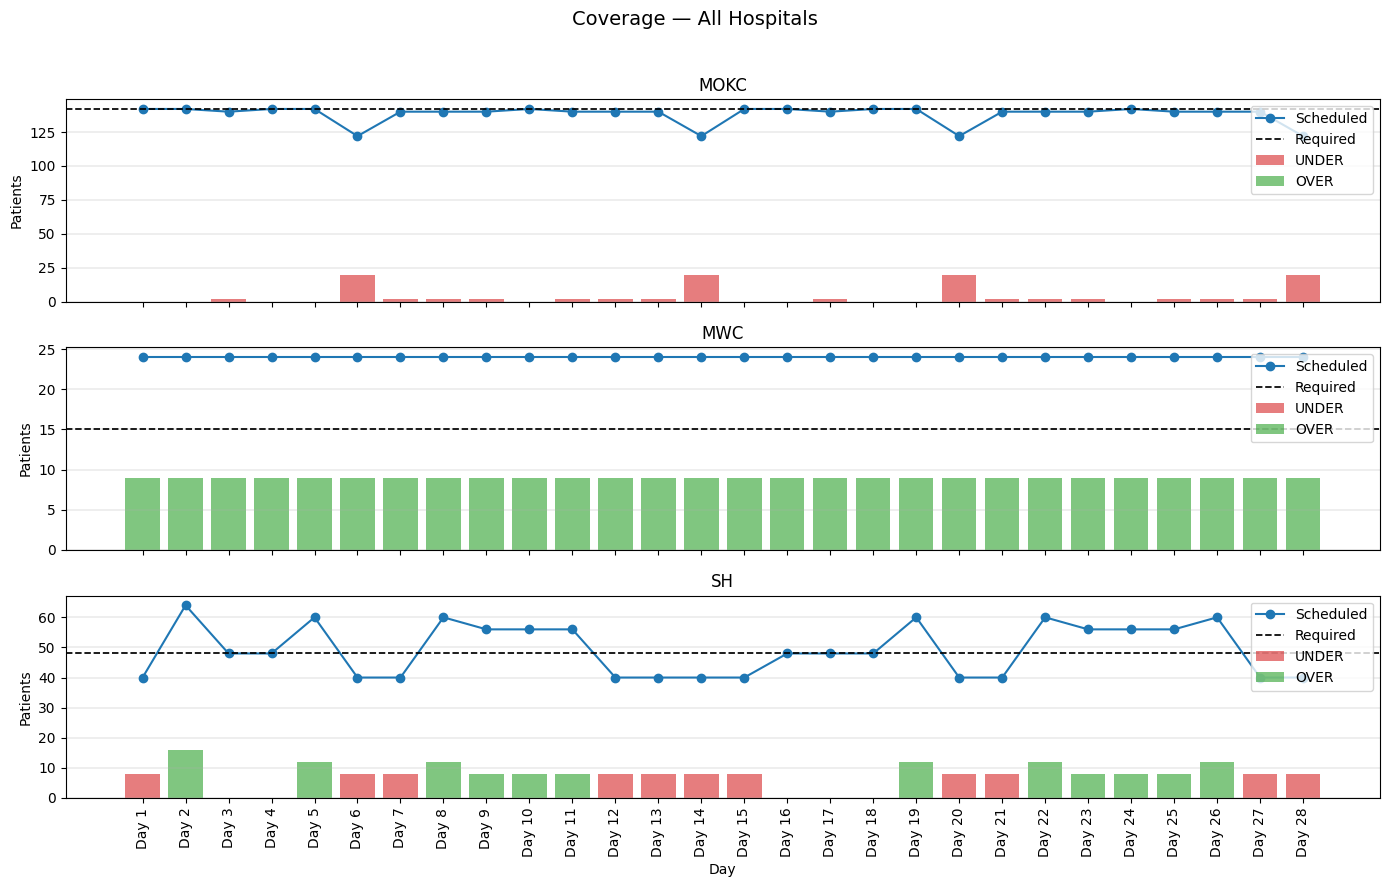

1 added doctor(s), under_penalty: 1e7


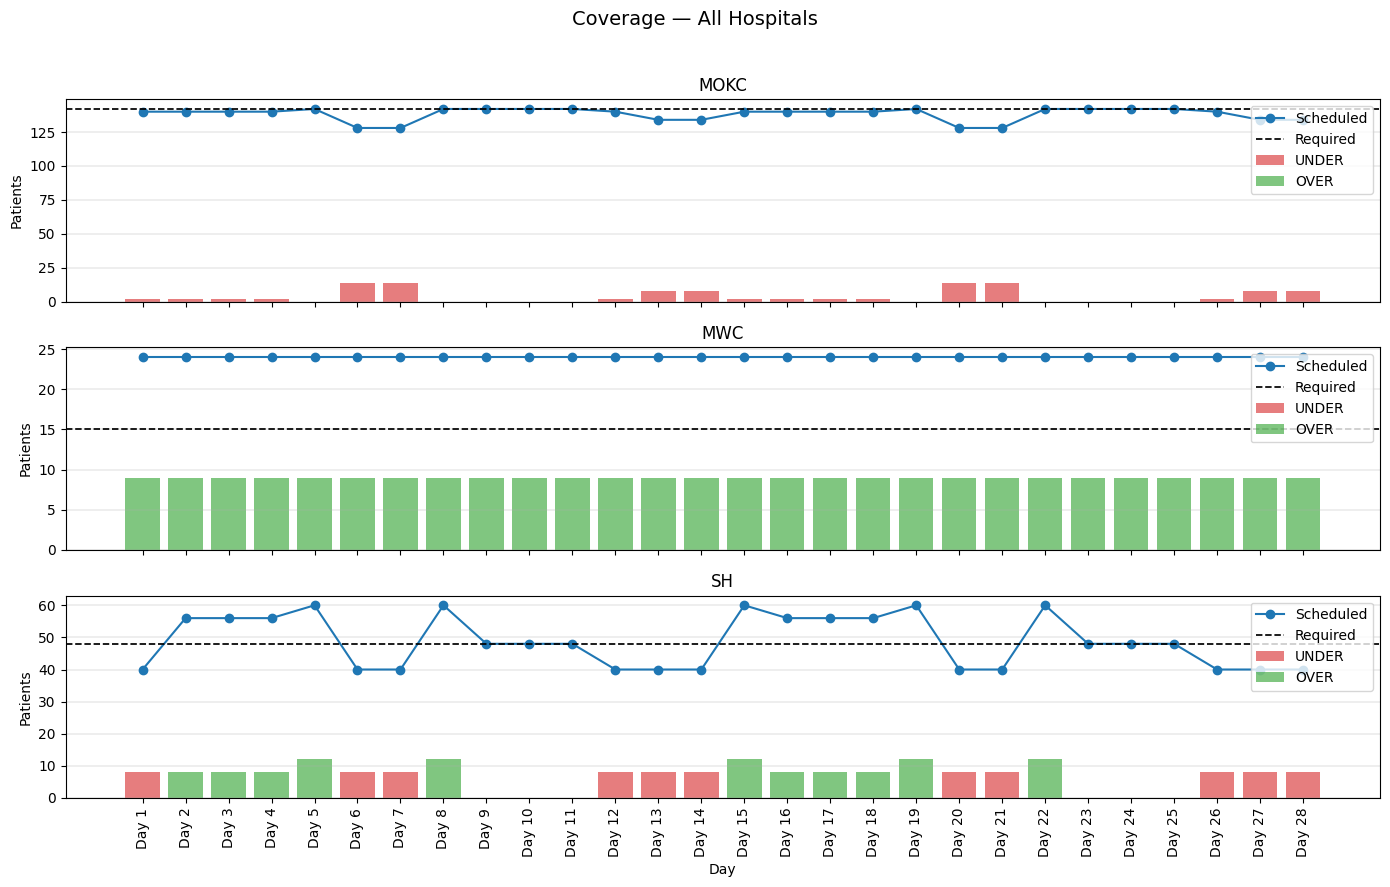

1 added doctor(s), under_penalty: 1e9


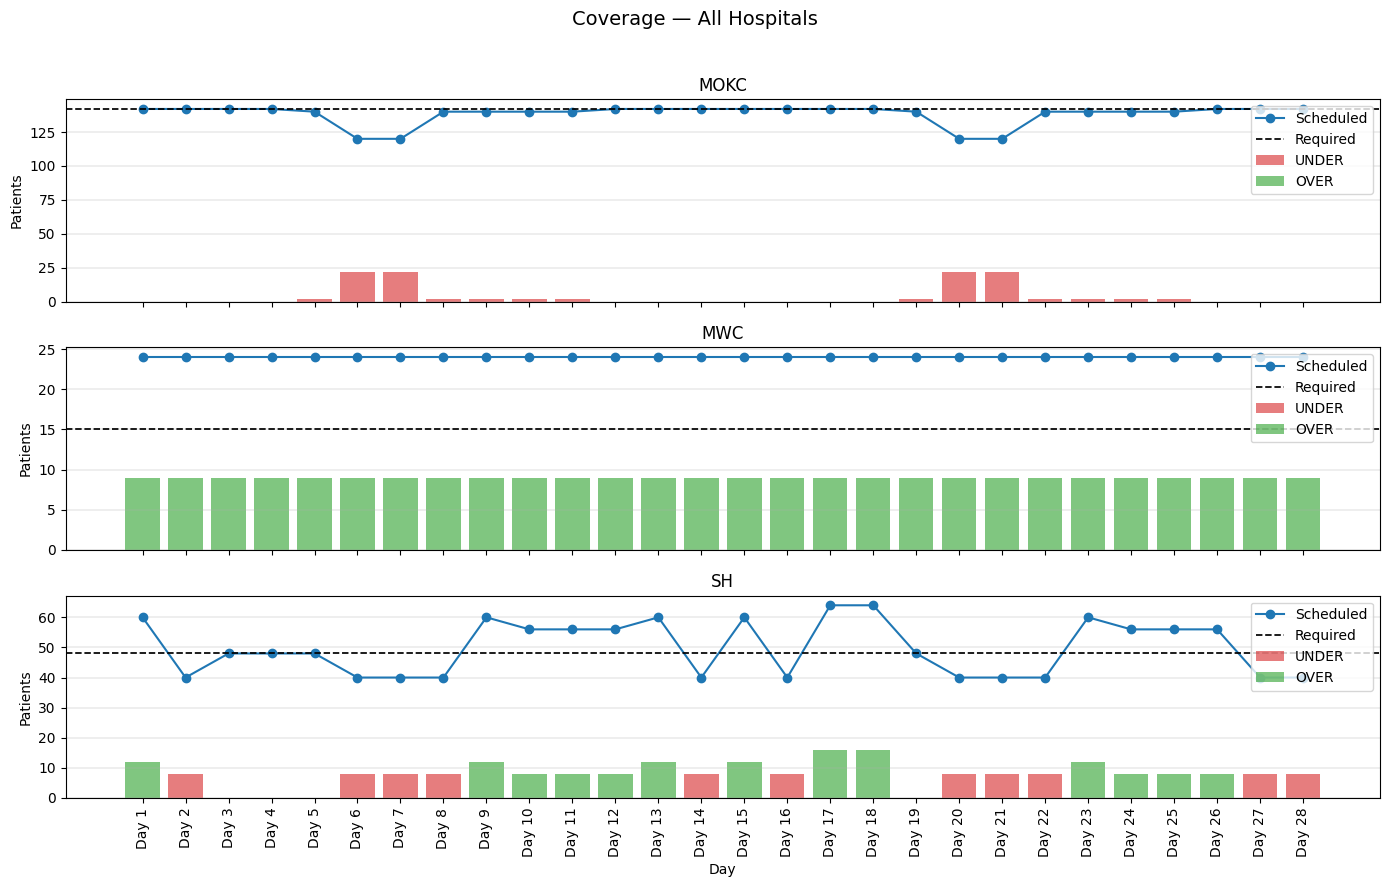

2 added doctor(s), under_penalty: 1e1


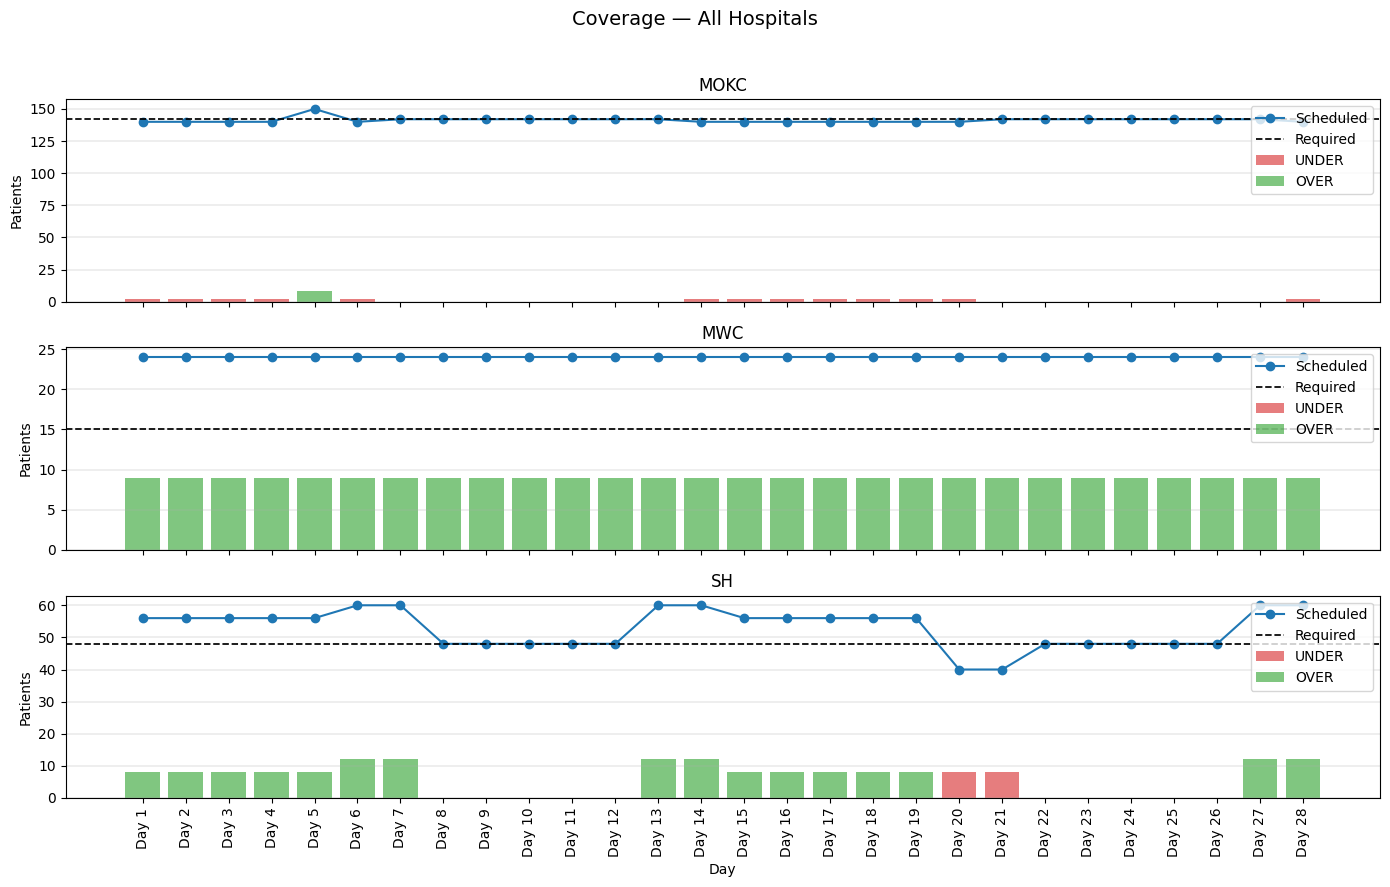

2 added doctor(s), under_penalty: 1e3


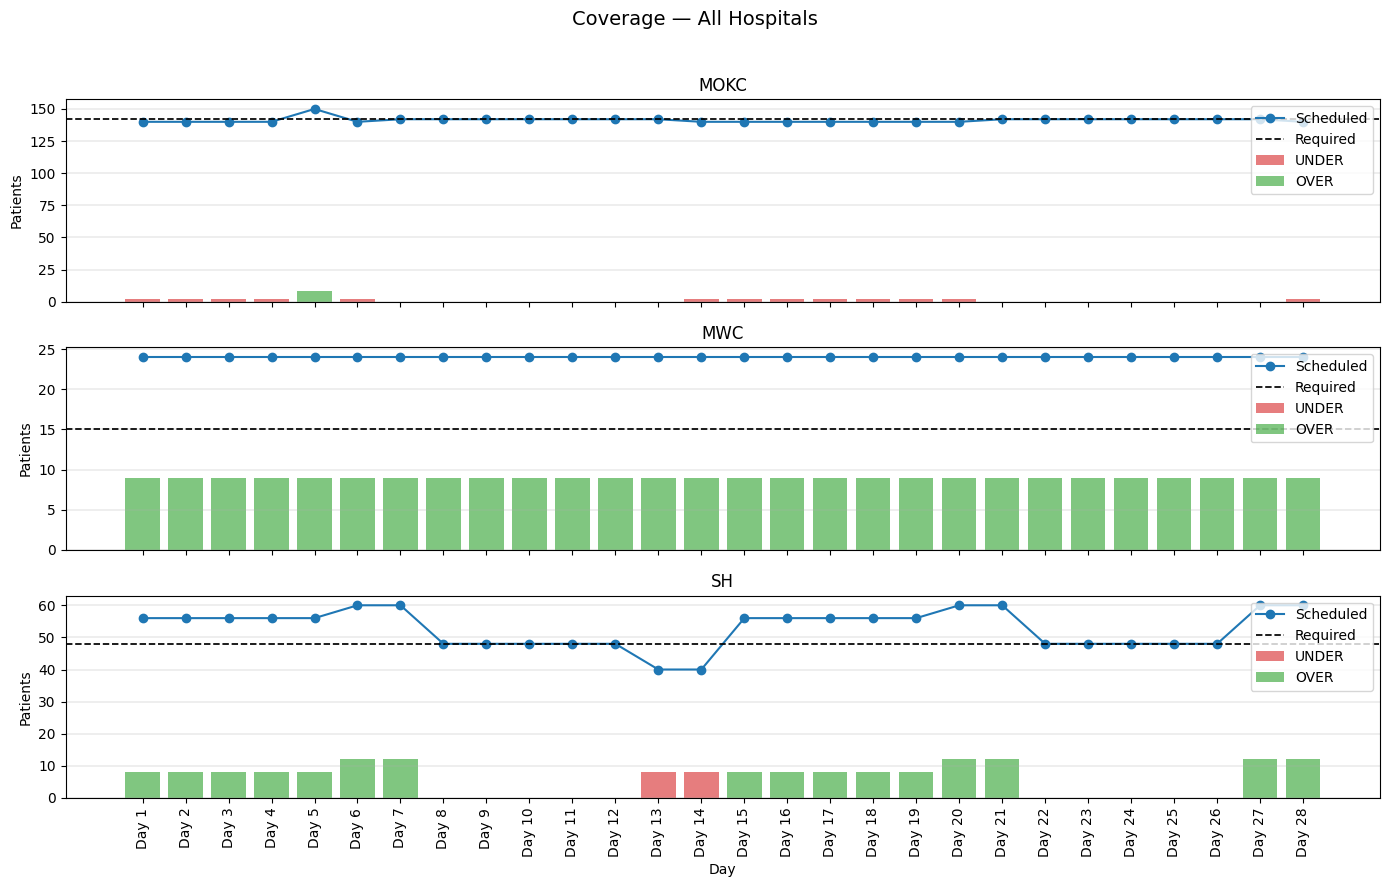

2 added doctor(s), under_penalty: 1e5


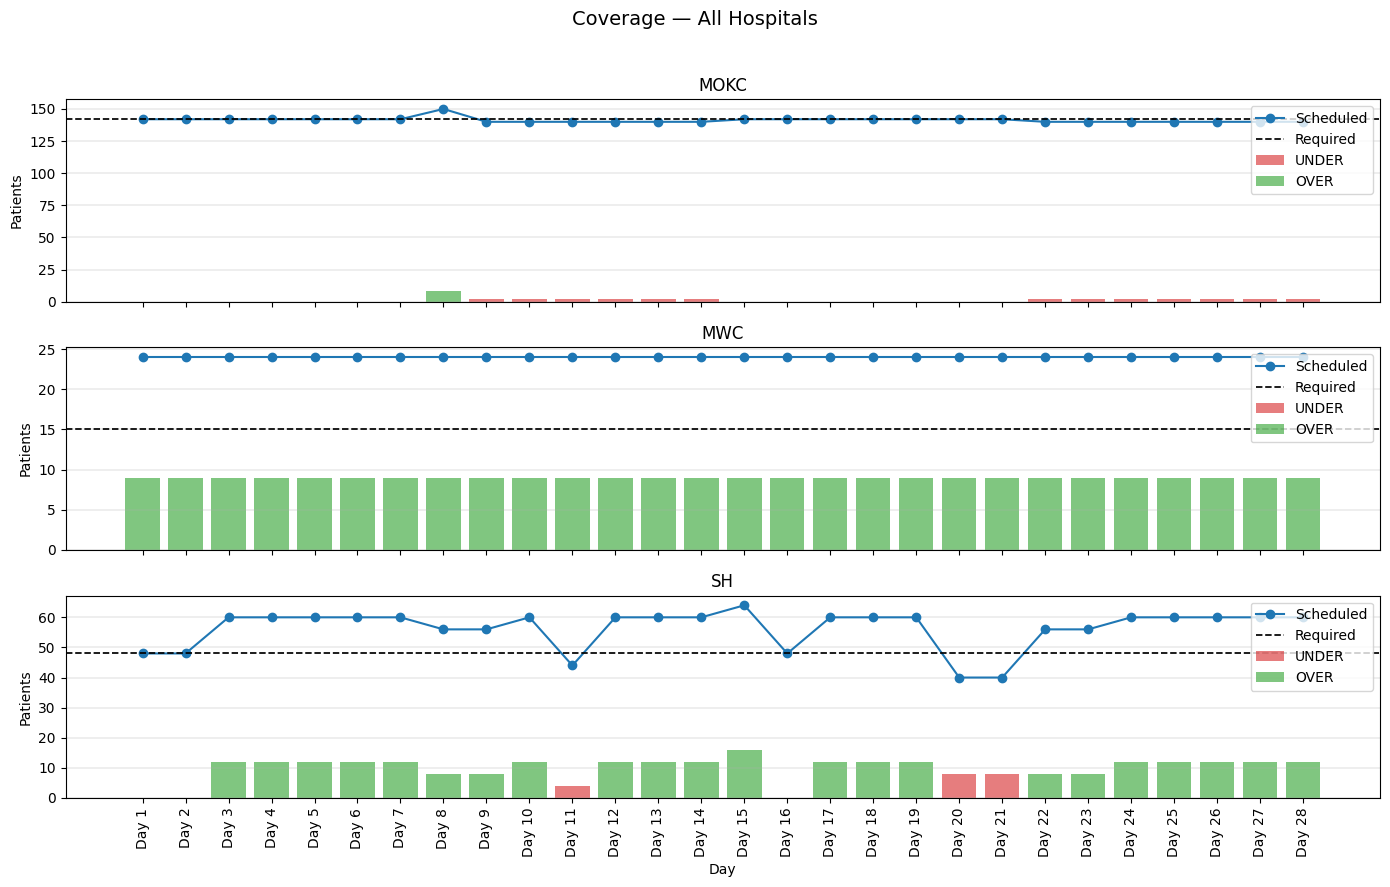

2 added doctor(s), under_penalty: 1e7


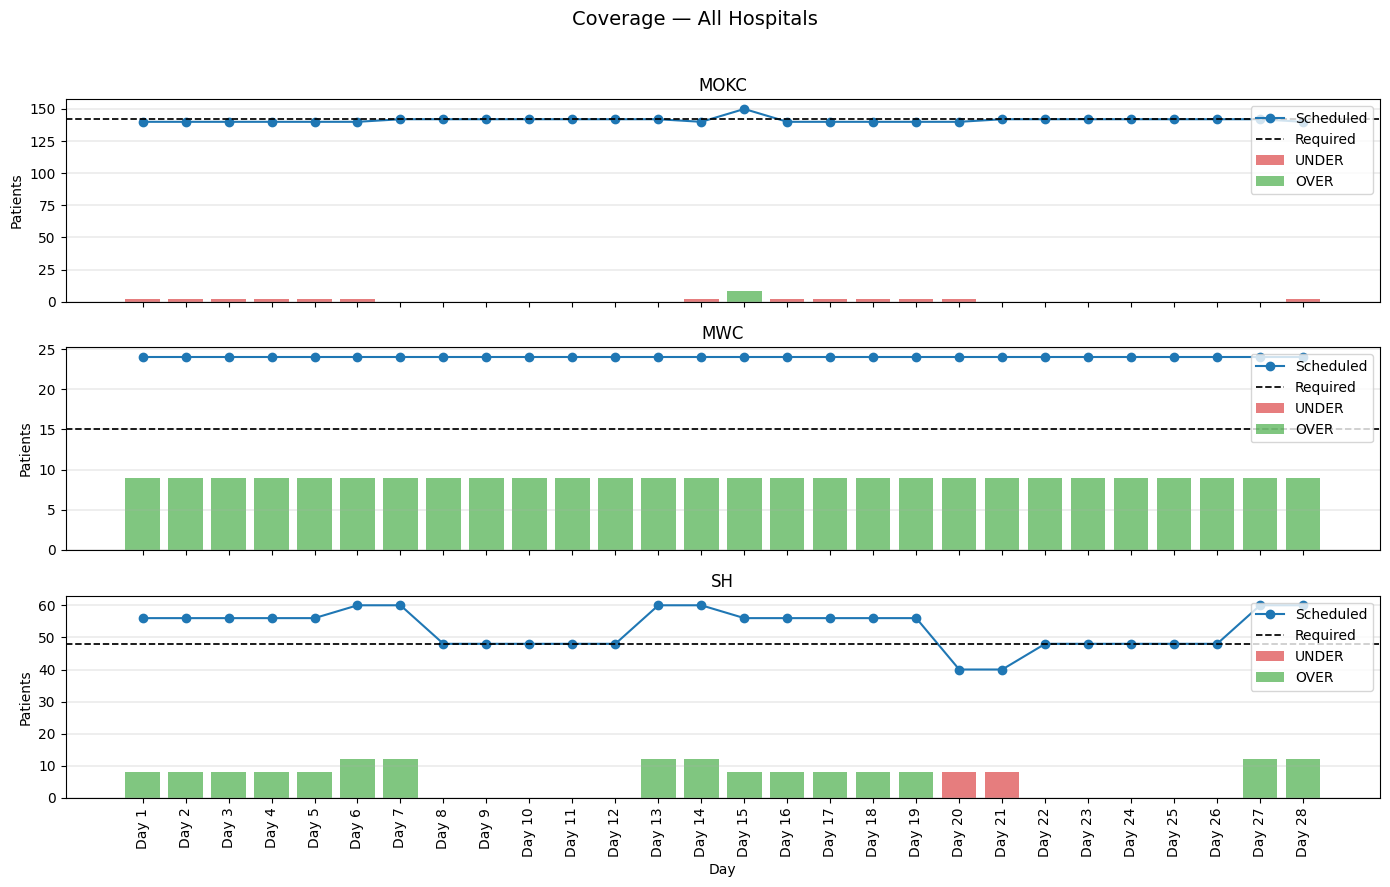

2 added doctor(s), under_penalty: 1e9


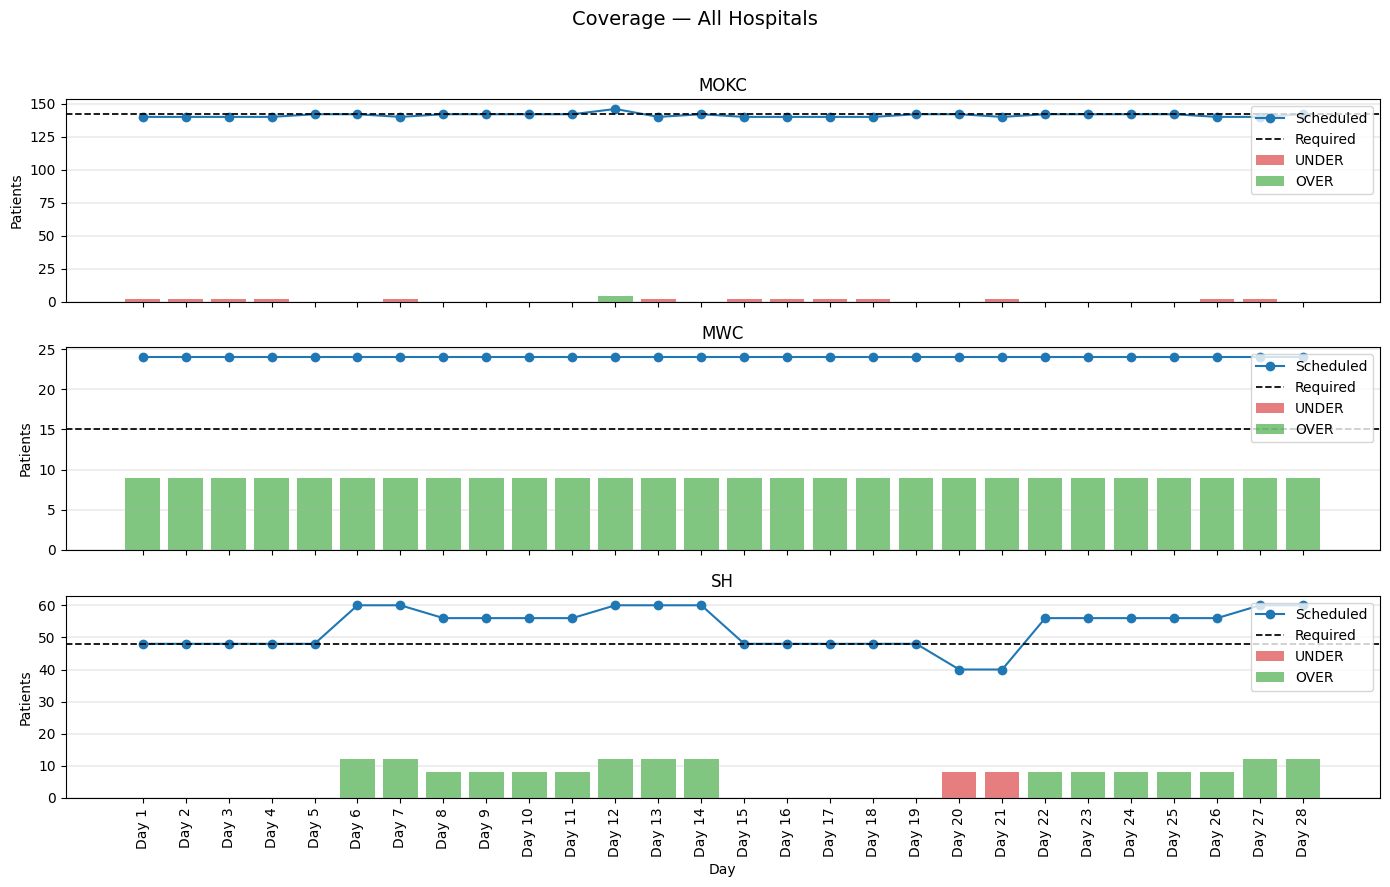

In [85]:
for d, r_ in zip([0,1,2], [results_no_new_docs, results_ft1, results_ft2]):
    for e, rs in zip(range(1,10, 2), r_):
        print(f"{d} added doctor(s), under_penalty: 1e{e}")
        rs[-1].plot_coverage()